# Fueling Sales at EuroPet

EuroPet S.A., a multinational company operating gas stations across Europe, has expanded into convenience store operations. In the mid-1990s they began to brand, market and develop their own convenience stores. The primary reasons to set up these c stores were; the additional revenue generated from the existing presence and growing competition from supermarkets attaching gas stations thereby lowering Europet’s primary source of revenue. Since its inception, the c stores have brought in steady income. Customers were willing to pay a considerable mark-up for goods sold at the c stores (weighted average 30% of sales).
The conventional competition for Europet has always been major energy companies; however in the recent past; supermarkets with considerable market presence, have attached gas stations to their existing stores. This is not only eating into EuroPet’s c stores revenues but also hampering their energy revenue. Barry Panayi, the Chief marketing officer; in a failed attempt increased the marketing budget by 50% bringing it to a total of €12 million. Since the additional spending did not translate to an increase in Sales; Elizabeth Tyler, a prominent executive from United Kingdom was brought in to address the disconnect between the advertising spend and the lack of improvement in sales. 

Hugh Blanchard, a seasoned executive at the retail marketing department at EuroPet, is responsible for allocating the advertising budget (including the recent incremental budget). 
Tyler questions the efficiency of Blanchard’s advertising spend and demands a critical evaluation by considering key data points and showing the factual correlation between advertising spending and sales. Her point of contention is that EuroPets current competitors barely advertise and are still eating into EuroPets market share. Tyler believes a regression analysis measuring the short-term and long-term effects of Blanchard’s advertising budget would help them gain a true picture and perhaps find a solution to the problem at hand. The variability of the analysis ought to be 85% for the variable to be considered significant/ valid. 

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scipy
# !pip install scikit-learn
# !pip install xlrd
# !pip install prettymaps
# !pip install basemap

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import prettymaps as pm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

from scipy import stats
from statsmodels.formula.api import ols
from mpl_toolkits.basemap import Basemap

**Let's look at the place where the data is collected.**
Blanchard’s choice of city, to conduct the analysis is Marseille; a metropolitan in the south of France is a strategic choice. Blanchard was aware of the variability existing in the c-store advertising spend in this area. He believes that this variability might make the regression analysis more meaningful, allowing for a better understanding of the impact of advertising expenditures on c-store sales​​. Similarly, the large population size, its status as a major port on the southern coast of France and diverse economic base would help in yielding insightful results. <weather> Finally, a huge factor in selection of Marseille to conduct the analysis is the significant presence of competitive brands.

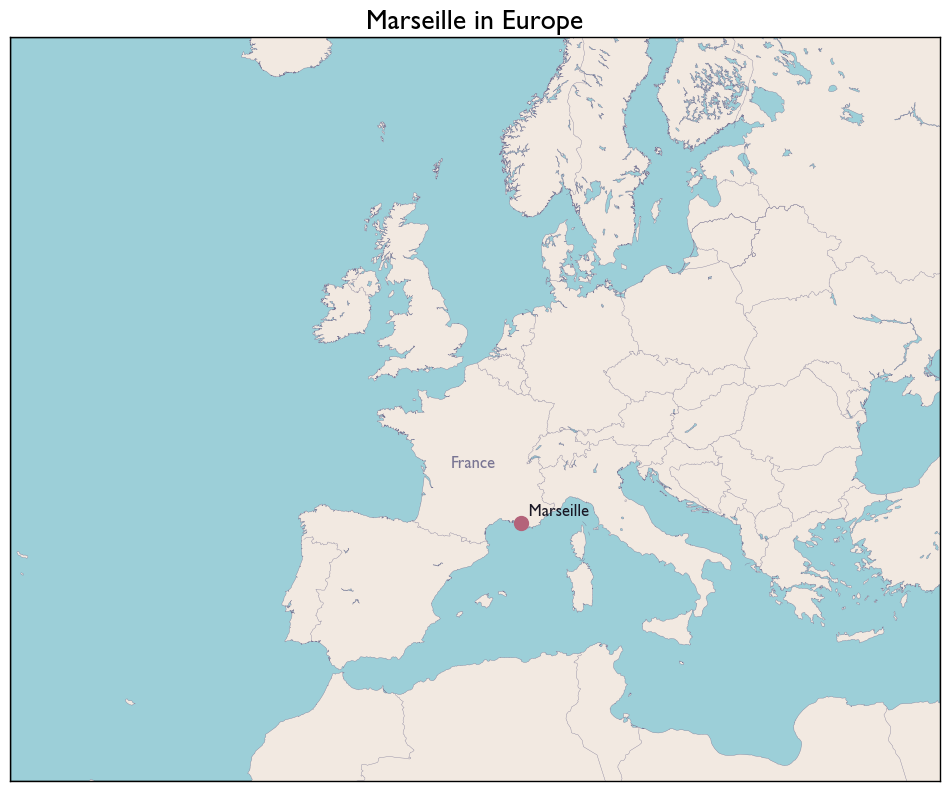

In [3]:
def draw_custom_map() -> None:
    """Draws a custom map of Europe with Marseille highlighted."""

    # Set the size of the plot
    plt.figure(figsize=(12, 10))
    plt.rcParams["figure.dpi"] = 400

    # Custom color definitions
    water_color = "#9ccfd8"
    land_color = "#f2e9e1"
    border_color = "#797593"
    marseille_dot_color = "#b4637a"

    # Create a Basemap instance that draws a map of Europe with custom colors.
    m = Basemap(
        projection="lcc",
        resolution="i",
        lat_0=48.8566,
        lon_0=2.3522,
        width=5e6,
        height=4e6,
    )

    # Set the custom colors for land and water
    m.drawmapboundary(fill_color=water_color)
    m.fillcontinents(color=land_color, lake_color=water_color)
    m.drawcountries(linewidth=0.25, color=border_color)
    m.drawcoastlines(linewidth=0.25, color=border_color)

    # Marseille coordinates
    marseille_lon, marseille_lat = 5.3698, 43.2965

    # Convert latitude and longitude to x and y coordinates
    x, y = m(marseille_lon, marseille_lat)

    # Plot the city of Marseille on the map with the custom color marker
    m.plot(
        x,
        y,
        "o",
        markersize=10,
        color=marseille_dot_color,
        markeredgecolor=marseille_dot_color,
    )

    # Label the city of Marseille with custom font
    plt.text(
        x + 2e4,
        y + 2e4,
        " Marseille",
        fontsize=12,
        ha="left",
        va="bottom",
        color="#191724",
        family="Gill Sans",
    )

    # Label the country of France
    france_x, france_y = m(
        2.2137, 46.2276
    )  # Approximate coordinates for the center of France
    plt.text(
        france_x,
        france_y,
        "France",
        fontsize=12,
        ha="center",
        va="center",
        color=border_color,
        family="Gill Sans",
    )

    plt.title("Marseille in Europe", family="Gill Sans", fontsize=20)
    plt.show()


# Draw the custom map
draw_custom_map()

**Let’s now have a look at Marseille, the city at the core of our analysis**

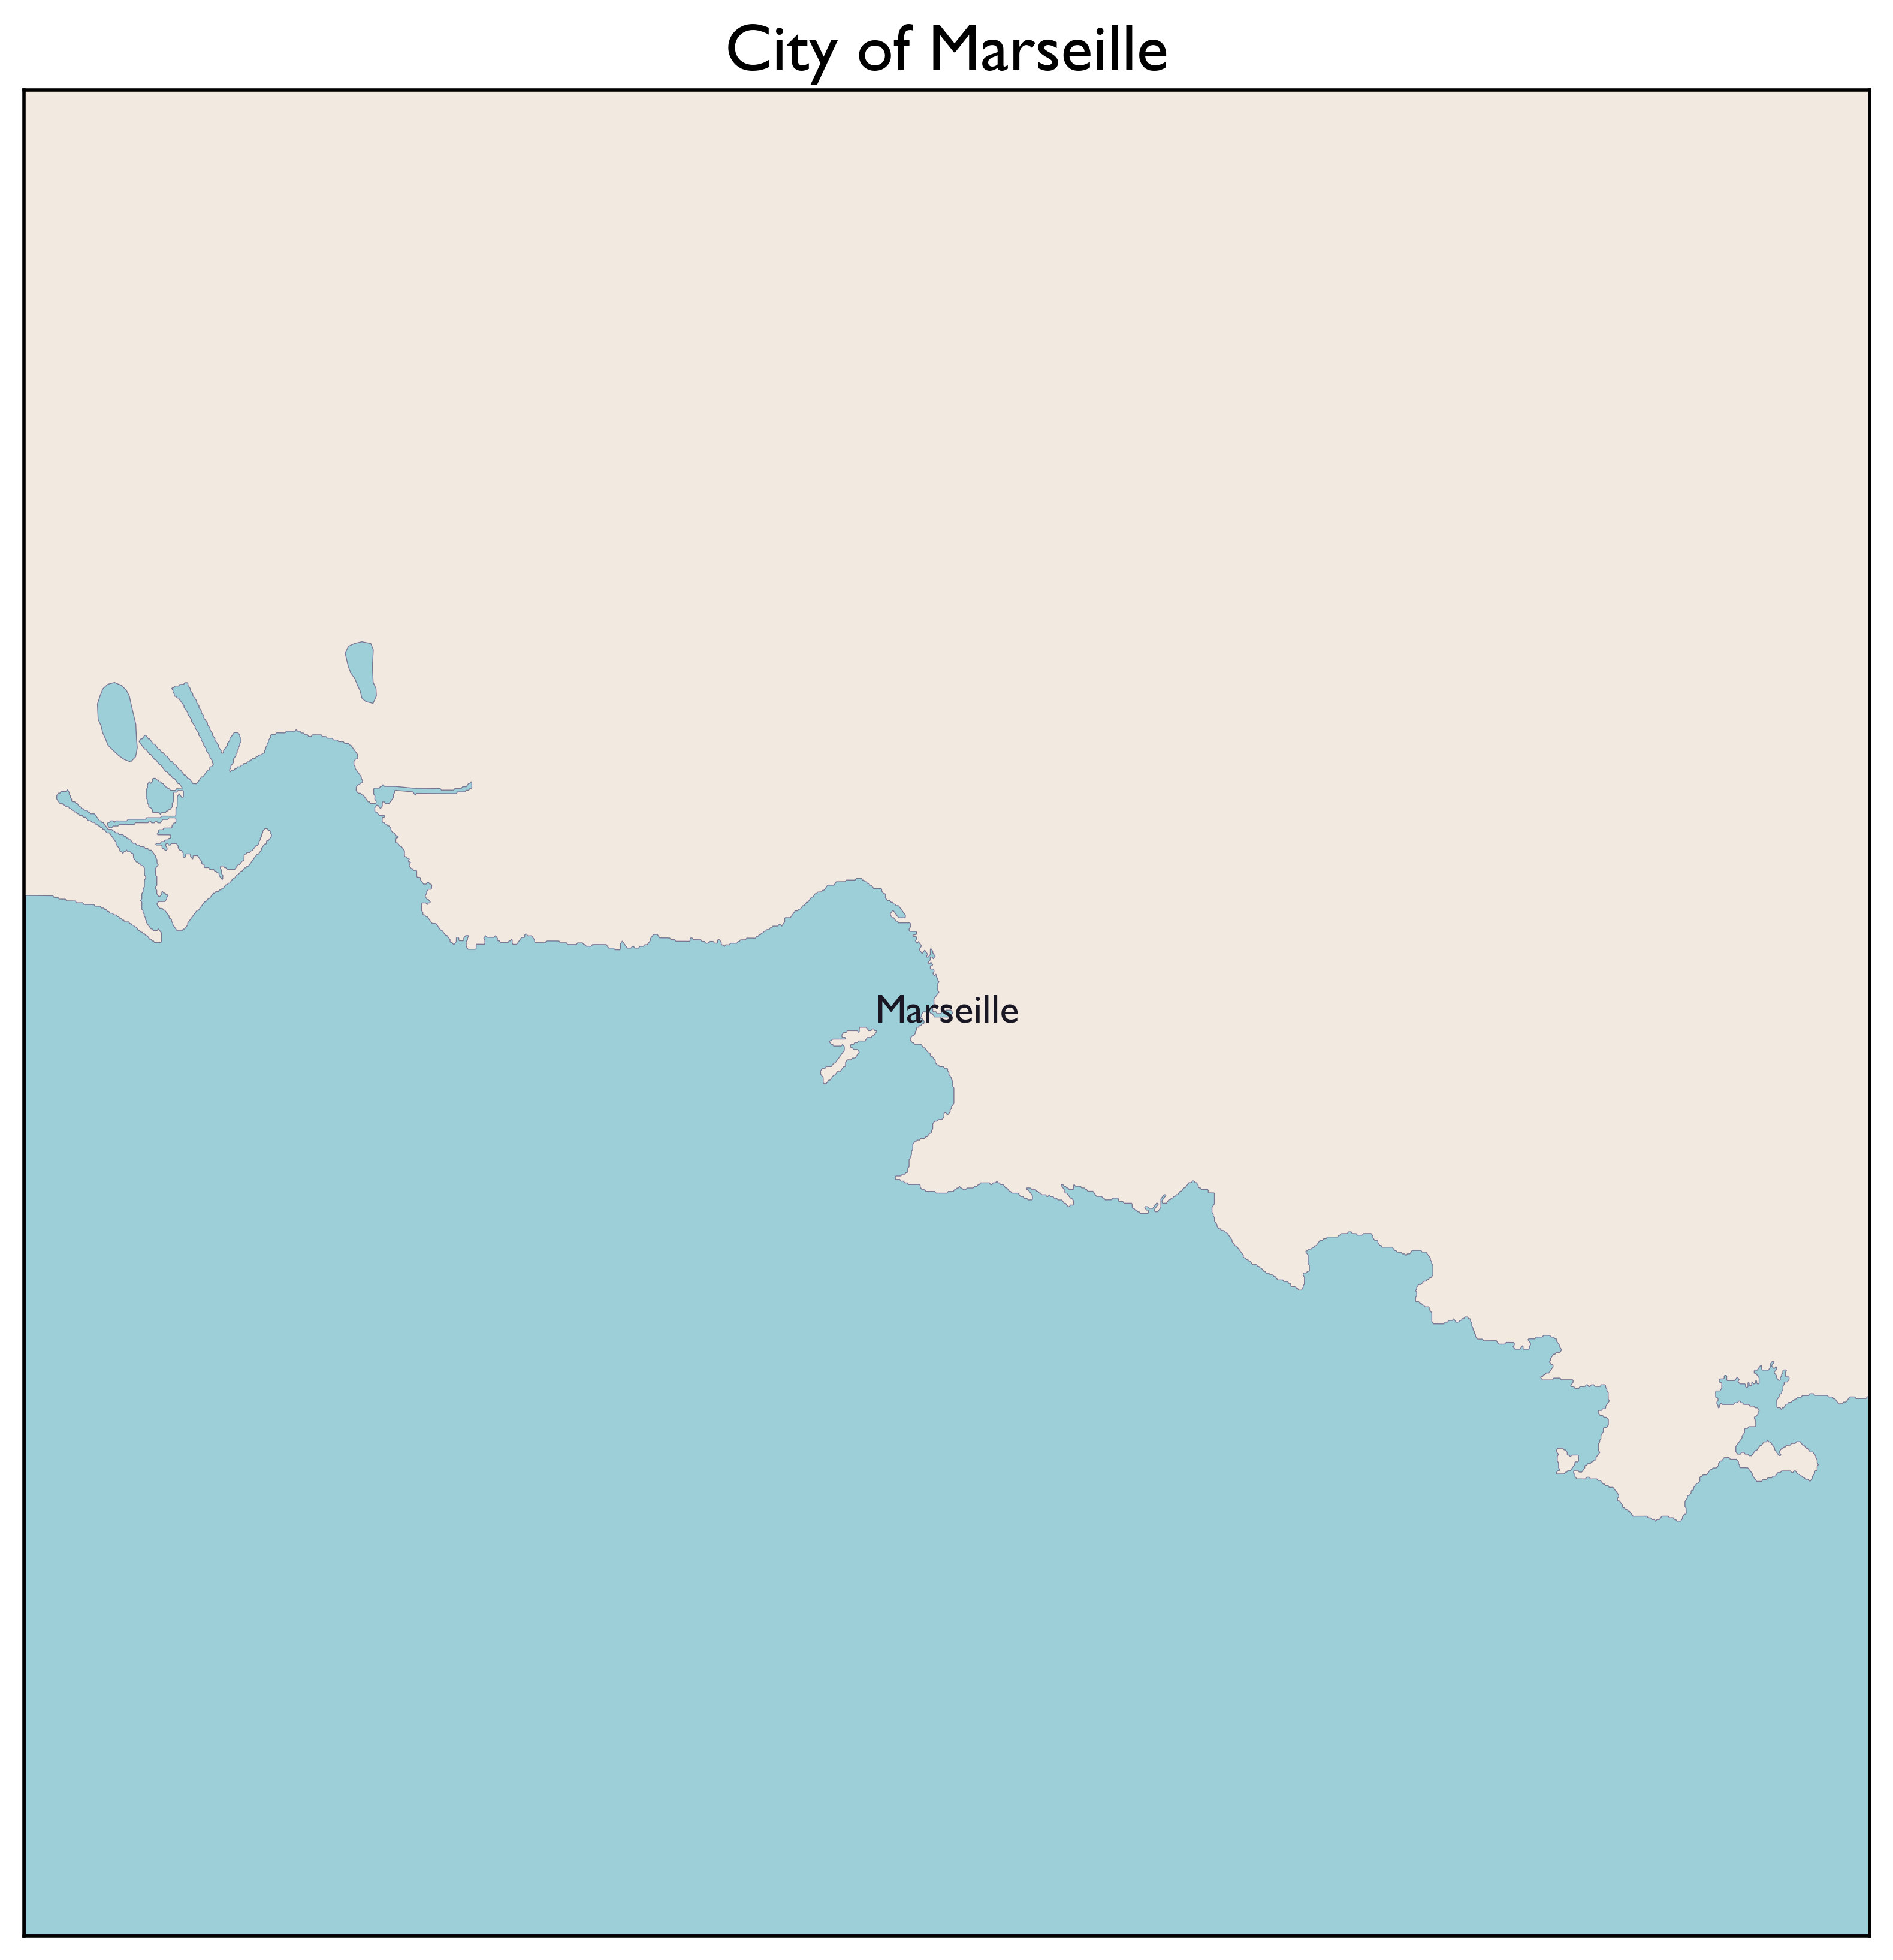

In [4]:
def draw_marseille_map() -> None:
    """Draws a map centered on Marseille with custom colors."""

    # Set the size of the plot and DPI
    plt.figure(figsize=(12, 10))
    plt.rcParams["figure.dpi"] = 400

    # Custom color definitions
    water_color = "#9ccfd8"
    land_color = "#f2e9e1"
    border_color = "#797593"
    marseille_label_color = "#191724"

    # Create a Basemap instance centered on Marseille with full resolution
    m = Basemap(
        projection="lcc",
        resolution="f",  # Set to full resolution
        lat_0=43.2965,  # Latitude of Marseille
        lon_0=5.3698,  # Longitude of Marseille
        width=1e5,
        height=1e5,
    )

    # Set the custom colors for land and water
    m.drawmapboundary(fill_color=water_color)
    m.fillcontinents(color=land_color, lake_color=water_color)
    m.drawcountries(linewidth=0.25, color=border_color)
    m.drawcoastlines(linewidth=0.25, color=border_color)

    # Marseille coordinates
    marseille_lon, marseille_lat = 5.3698, 43.2965

    # Convert latitude and longitude to x and y coordinates for Marseille
    x, y = m(marseille_lon, marseille_lat)

    # Label the city of Marseille with custom font
    plt.text(
        x,
        y,
        "Marseille",
        fontsize=12,
        ha="center",
        va="center",
        color=marseille_label_color,
        family="Gill Sans",
    )

    # Set the title of the plot
    plt.title("City of Marseille", family="Gill Sans", fontsize=20)

    # Display the plot
    plt.show()


# Draw the map of Marseille
draw_marseille_map()

## Start of the Analysis

### Importing the data

In [5]:
df = pd.read_excel('./EuroPet.xls')

df[["Sales", "Fuel Volume", "TV", "Radio"]] = df[
    ["Sales", "Fuel Volume", "TV", "Radio"]
].apply(pd.to_numeric, errors="coerce")

## Overview of the Dataset

Our dataset for analysing Europets current market situation are weekly observations in Marseille against total sales, fuel volume, TV and radio advertising metrics.
To get an overview, we have analysed the minimum, average and maximum values in our dataset.

In [6]:
df.head()

,Week,Sales,TV,Radio,Fuel Volume,Fuel Price,Temp,Prec,Holiday,Visits (1 or 2)
0,26,24864,74.5,66.5,61825,104.24,27.9,0.9,1,7.0
1,27,23809,74.5,66.5,62617,103.97,27.7,1.3,1,7.0
2,28,24476,90.0,75.0,60227,107.48,29.1,4.8,1,5.9
3,29,25279,90.0,75.0,63273,111.75,30.0,3.1,1,5.9
4,30,26263,90.0,75.0,65196,109.08,29.3,0.0,1,5.9


In [7]:
df.describe()

,Week,Sales,TV,Radio,Fuel Volume,Fuel Price,Temp,Prec,Holiday,Visits (1 or 2)
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,26.574257,23063.732673,41.277228,80.470297,62852.762376,115.514752,17.950495,11.340594,0.465347,5.641584
std,15.298592,2450.545029,69.623828,99.898469,2327.310749,8.289507,6.503839,6.784898,0.501285,2.809031
min,1.000000,18969.000000,0.000000,0.000000,56259.000000,101.460000,9.100000,0.000000,0.000000,0.000000
25%,13.000000,21171.000000,0.000000,0.000000,61754.000000,107.990000,12.000000,6.200000,0.000000,3.200000
50%,27.000000,22924.000000,0.000000,0.000000,63136.000000,115.500000,16.800000,10.900000,0.000000,6.000000
75%,40.000000,24489.000000,70.000000,205.000000,64637.000000,120.940000,23.100000,14.500000,1.000000,7.000000
max,52.000000,28451.000000,225.000000,260.000000,68549.000000,133.670000,30.700000,30.300000,1.000000,12.500000


---

## Q1. Analysis of the dataset
### 1.1 Sales

For Sales distribution we observe that the minimum sales incurred is 18,969 Euros, the mean sales incurred is 23,063.73 Euros while the maximum sales incurred is 28,451 Euros. The frequency of Sales is highest between the minimum and mean values, beyond which the frequency of sales reduces gradually.

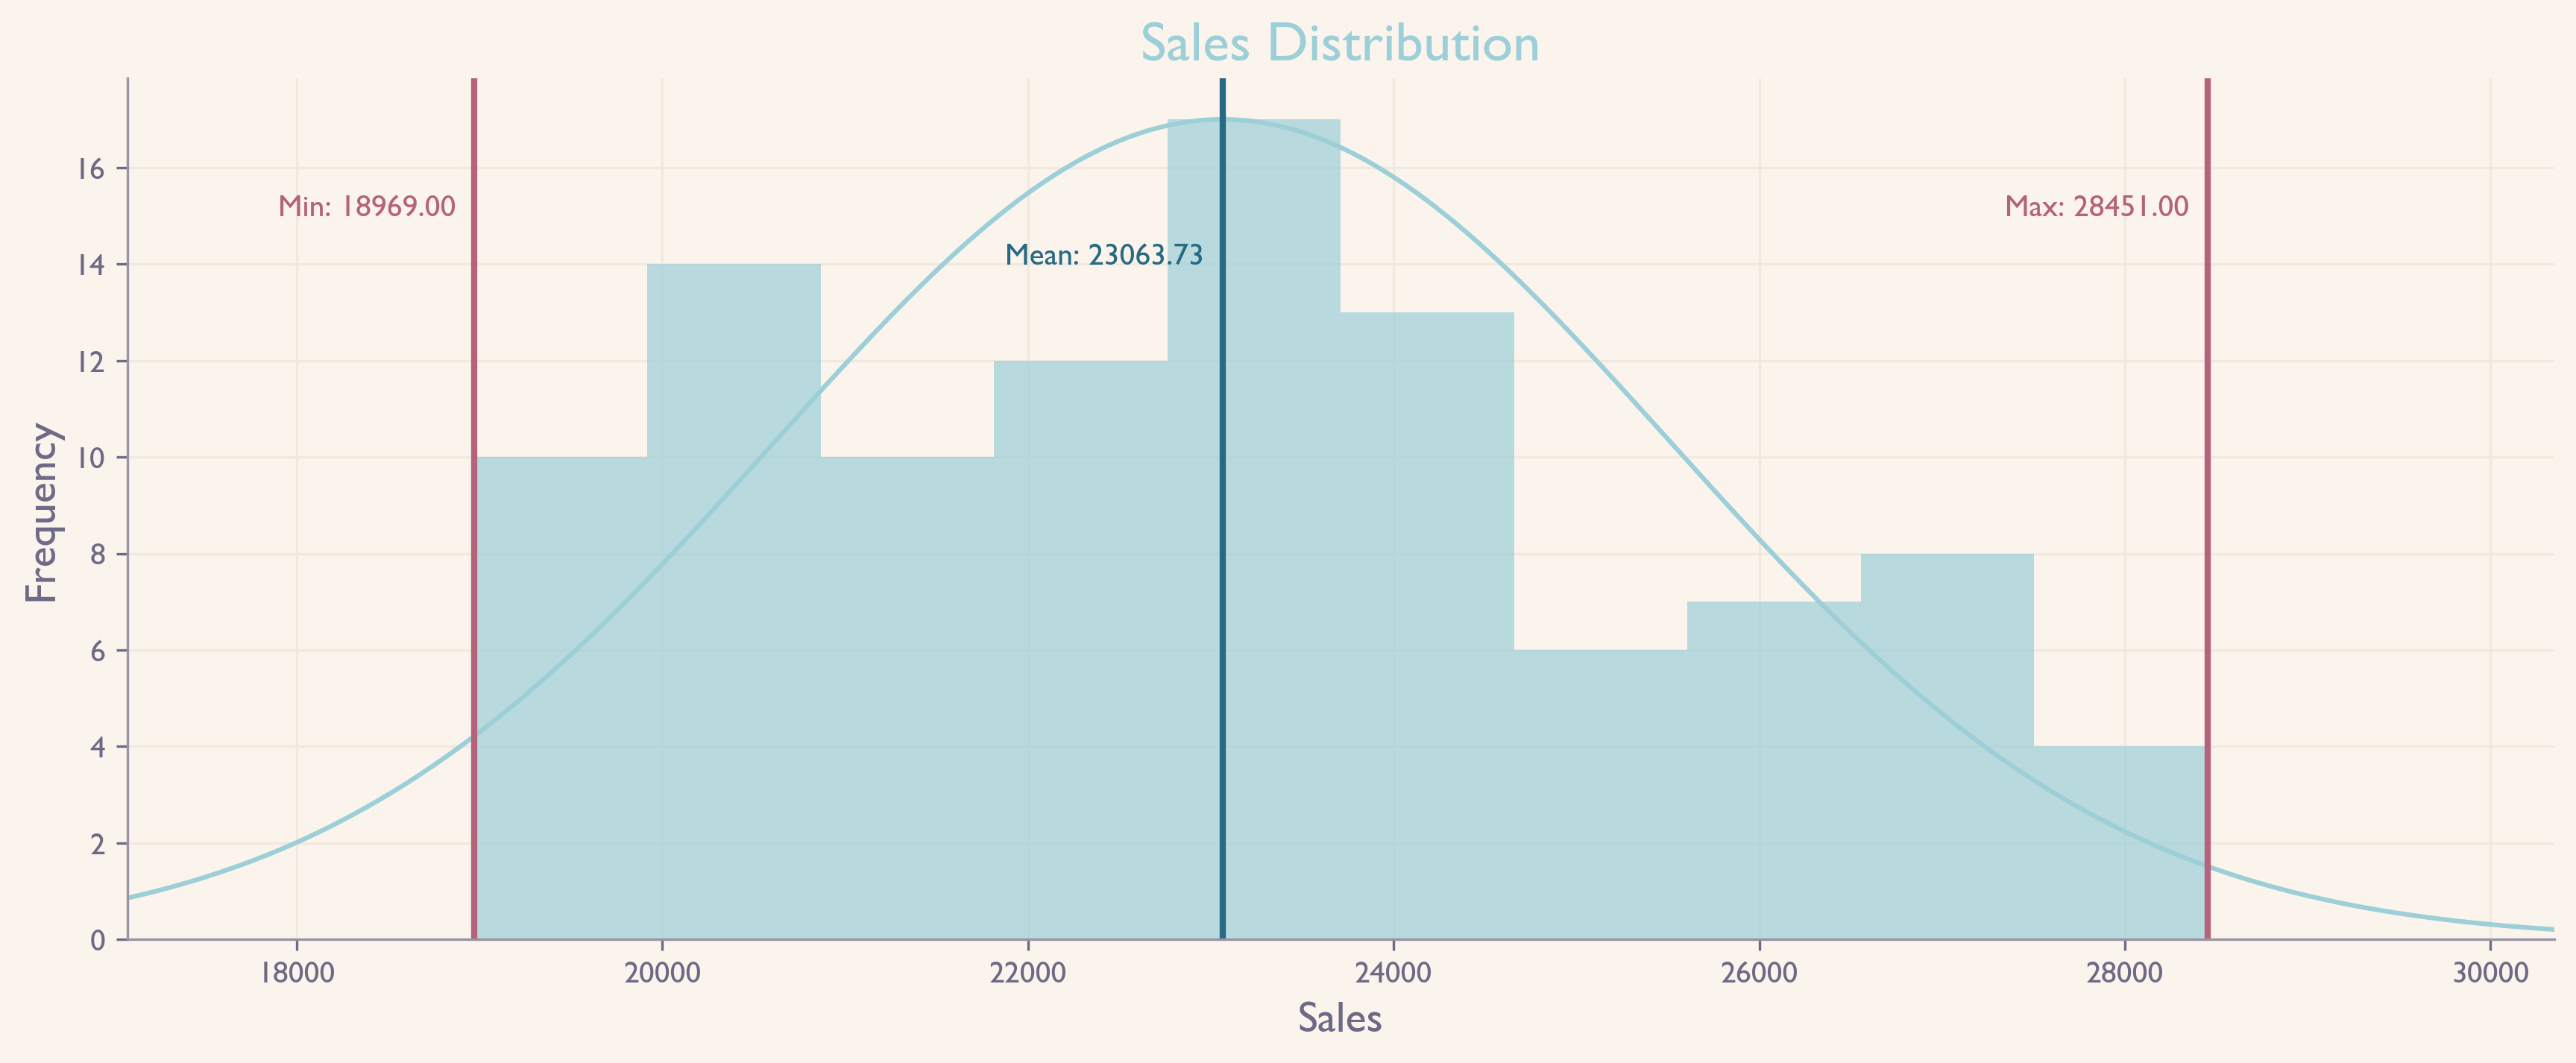

In [8]:
# Apply styles and fonts
plt.style.use("rose-pine-dawn")
plt.rcParams["font.family"] = "Gill Sans"
plt.rcParams["figure.dpi"] = 300

# Create figure
plt.figure(figsize=(14, 5))
ax = plt.gca()

# Plot histogram
n, bins, patches = plt.hist(df["Sales"], bins=10, color="#9ccfd8", alpha=0.7)

# Calculate statistics
min_value = df["Sales"].min()
max_value = df["Sales"].max()
mean_value = df["Sales"].mean()
std_dev = df["Sales"].std()

# Overlay line chart
num_std_dev = (
    3  # Number of standard deviations to include on either side of the mean
)
x_min_gauss = mean_value - num_std_dev * std_dev
x_max_gauss = mean_value + num_std_dev * std_dev
x_gauss = np.linspace(x_min_gauss, x_max_gauss, 300)
y_gauss = stats.norm.pdf(x_gauss, mean_value, std_dev)

# Adjust the scaling of the Gaussian curve to fit the histogram
hist_max_height = max(n)  # Maximum height of the histogram
gauss_max_height = max(y_gauss)  # Maximum height of the Gaussian curve
scaling_factor = hist_max_height / gauss_max_height
ax.plot(x_gauss, y_gauss * scaling_factor, color="#9ccfd8")

# Set limits and title
x_pad = (max_value - min_value) * 0.2  # 20% padding
x_min, x_max = min_value - x_pad, max_value + x_pad
plt.xlim(x_min, x_max)

# Draw lines for min, max, and mean
plt.axvline(min_value, color="#b4637a", linestyle="-", lw=2)
plt.axvline(max_value, color="#b4637a", linestyle="-", lw=2)
plt.axvline(mean_value, color="#286983", linestyle="-", lw=2)

# Annotations for min, max, and mean
ax.annotate(
    f"Min: {min_value:.2f}",
    xy=(min_value, 5),
    xytext=(min_value - 100, 15),
    ha="right",
    color="#b4637a",
)
ax.annotate(
    f"Max: {max_value:.2f}",
    xy=(max_value, 5),
    xytext=(max_value - 100, 15),
    ha="right",
    color="#b4637a",
)
ax.annotate(
    f"Mean: {mean_value:.2f}",
    xy=(mean_value, 5),
    xytext=(mean_value- 100, 14),
    ha="right",
    color="#286983",
)

# Set labels and grid
ax.set_xlabel("Sales", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.grid(True)

plt.title("Sales Distribution", fontsize=18, color="#9ccfd8")

# Show the plot
plt.show()

### 1.2 Fuel Volume

In the case of Fuel volume distribution, the minimum fuel volume sold is 56,259 Litres, the average being 62,852.76 litres and the maximum is 68,549 litres. We observe that the frequency of fuel volume being sold is highest at the average i.e. 62,852.76 litres i.e. most c stores in Marseille sell approximately 62,852.76 litres of fuel weekly.


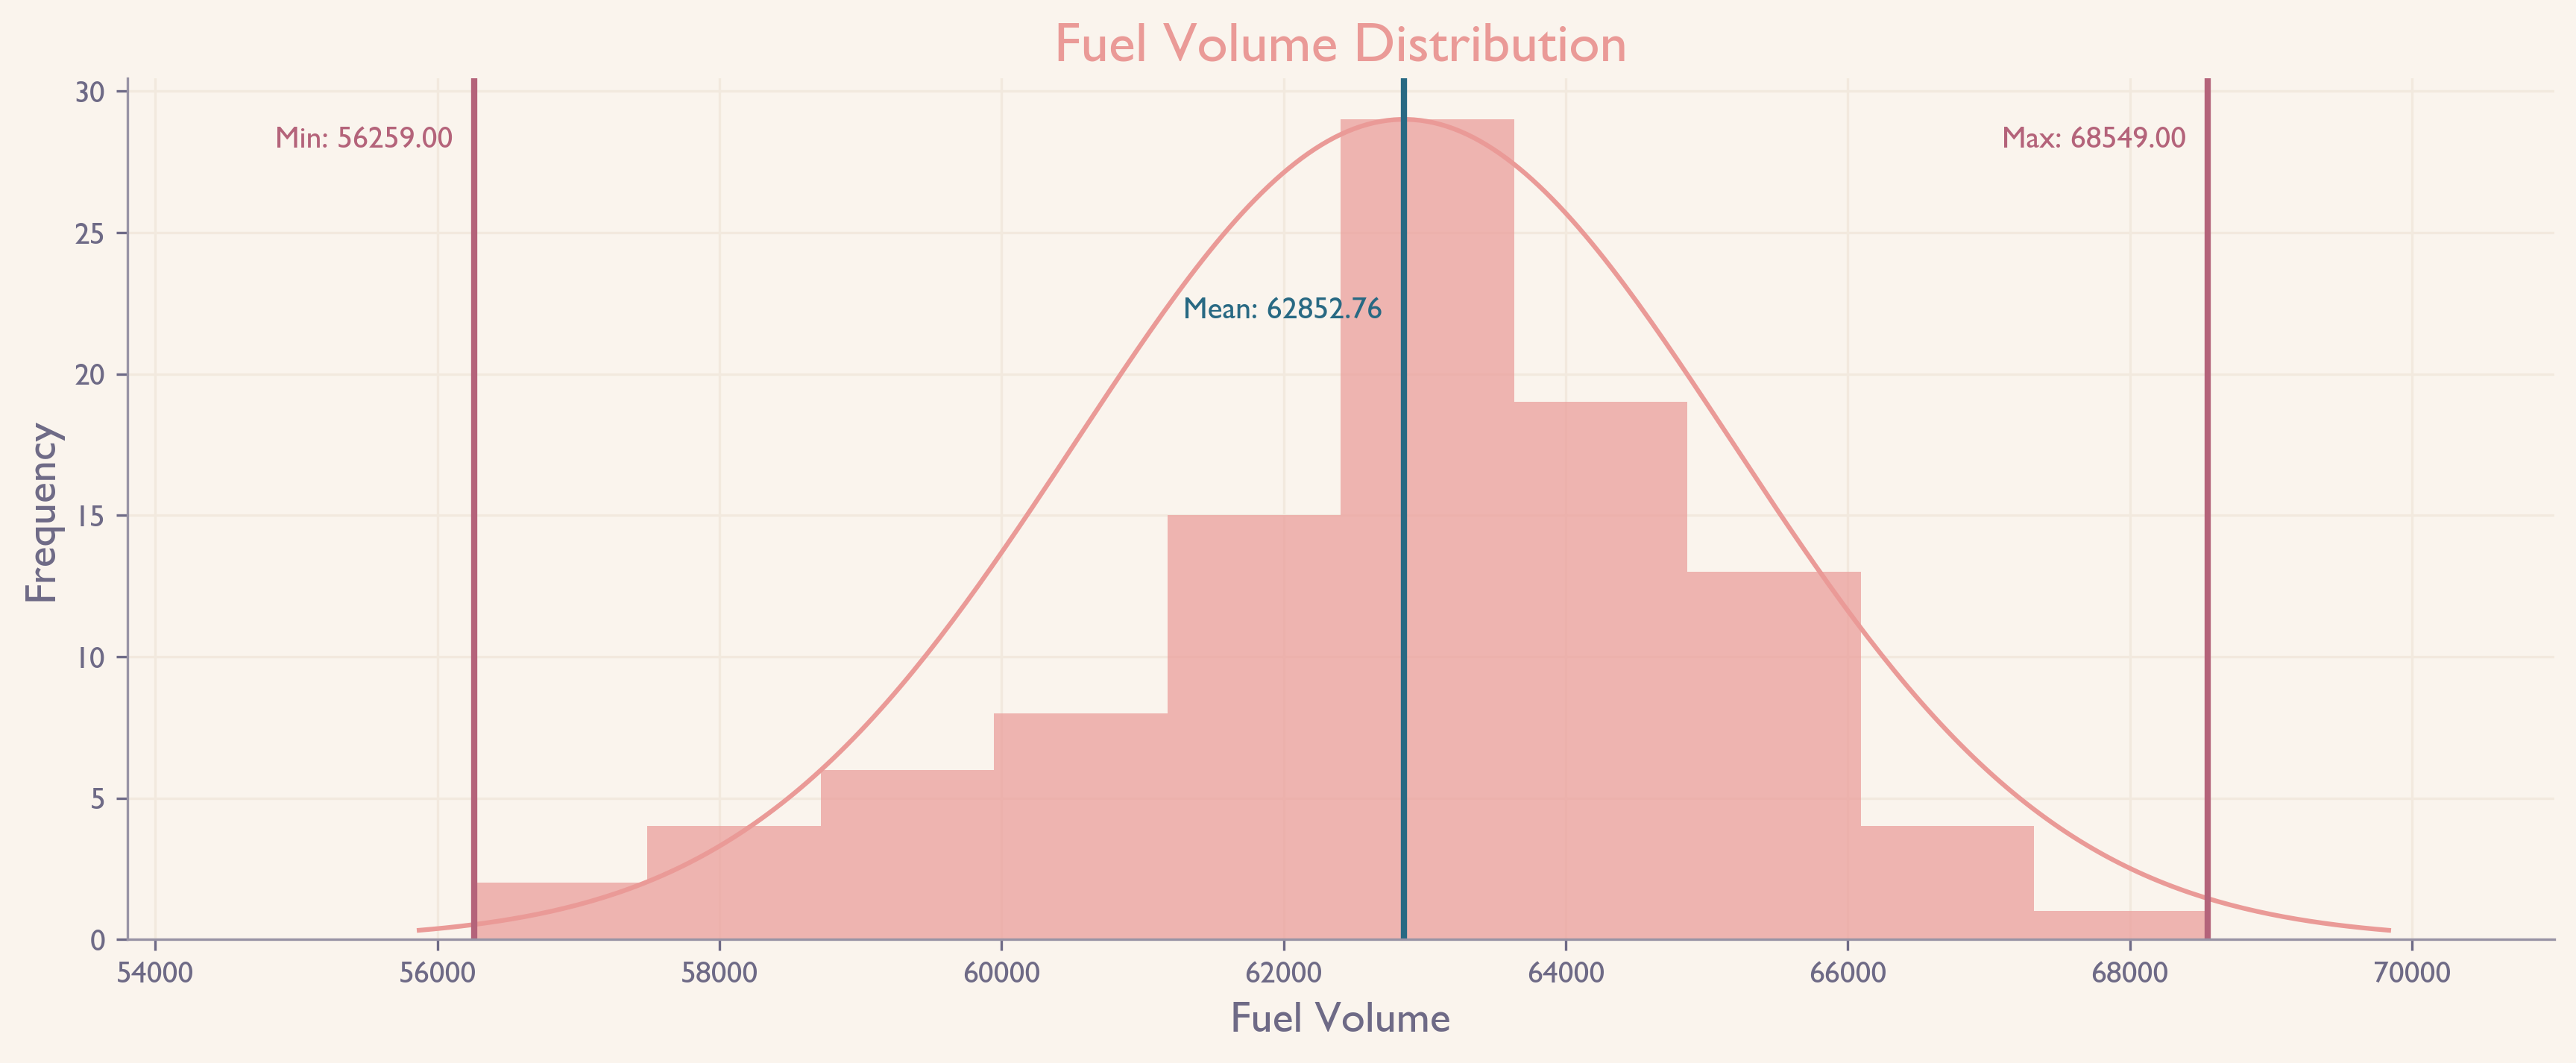

In [9]:
# Apply styles and fonts
plt.style.use("rose-pine-dawn")
plt.rcParams["font.family"] = "Gill Sans"
plt.rcParams["figure.dpi"] = 300

# Create figure
plt.figure(figsize=(14, 5))
ax = plt.gca()

# Plot histogram
n, bins, patches = plt.hist(
    df["Fuel Volume"], bins=10, color="#ea9a97", alpha=0.7
)

# Calculate statistics
min_value = df["Fuel Volume"].min()
max_value = df["Fuel Volume"].max()
mean_value = df["Fuel Volume"].mean()
std_dev = df["Fuel Volume"].std()

# Overlay line chart
num_std_dev = (
    3  # Number of standard deviations to include on either side of the mean
)
x_min_gauss = mean_value - num_std_dev * std_dev
x_max_gauss = mean_value + num_std_dev * std_dev
x_gauss = np.linspace(x_min_gauss, x_max_gauss, 300)
y_gauss = stats.norm.pdf(x_gauss, mean_value, std_dev)

# Adjust the scaling of the Gaussian curve to fit the histogram
hist_max_height = max(n)  # Maximum height of the histogram
gauss_max_height = max(y_gauss)  # Maximum height of the Gaussian curve
scaling_factor = hist_max_height / gauss_max_height
ax.plot(x_gauss, y_gauss * scaling_factor, color="#ea9a97")

# Set limits and title
x_pad = (max_value - min_value) * 0.2  # 20% padding
x_min, x_max = min_value - x_pad, max_value + x_pad
plt.xlim(x_min, x_max)

# Draw lines for min, max, and mean
plt.axvline(min_value, color="#b4637a", linestyle="-", lw=2)
plt.axvline(max_value, color="#b4637a", linestyle="-", lw=2)
plt.axvline(mean_value, color="#286983", linestyle="-", lw=2)

# Annotations for min, max, and mean
ax.annotate(
    f"Min: {min_value:.2f}",
    xy=(min_value, 5),
    xytext=(min_value - 150, 28),
    ha="right",
    color="#b4637a",
)
ax.annotate(
    f"Max: {max_value:.2f}",
    xy=(max_value, 5),
    xytext=(max_value - 150, 28),
    ha="right",
    color="#b4637a",
)
ax.annotate(
    f"Mean: {mean_value:.2f}",
    xy=(mean_value, 5),
    xytext=(mean_value - 150, 22),
    ha="right",
    color="#286983",
)

# Set labels and grid
ax.set_xlabel("Fuel Volume", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.grid(True)

plt.title("Fuel Volume Distribution", fontsize=18, color="#ea9a97")

# Show the plot
plt.show()

### 1.3 TV Distribution

With regards to TV distribution, one GRP (x-axis should be grp) represents 1 percent of EuroPet’s target audience being reached one time. The total can exceed 100 if portions of the target audience are reached repeatedly within a week. The number of weekly hits on an average was 41.28 while the maximum was 225. We observe that the maximum reach for TV advertising was between 0 to 20 GRP beyond which <>(The average cost of a TV GRP in Marseille was €300)

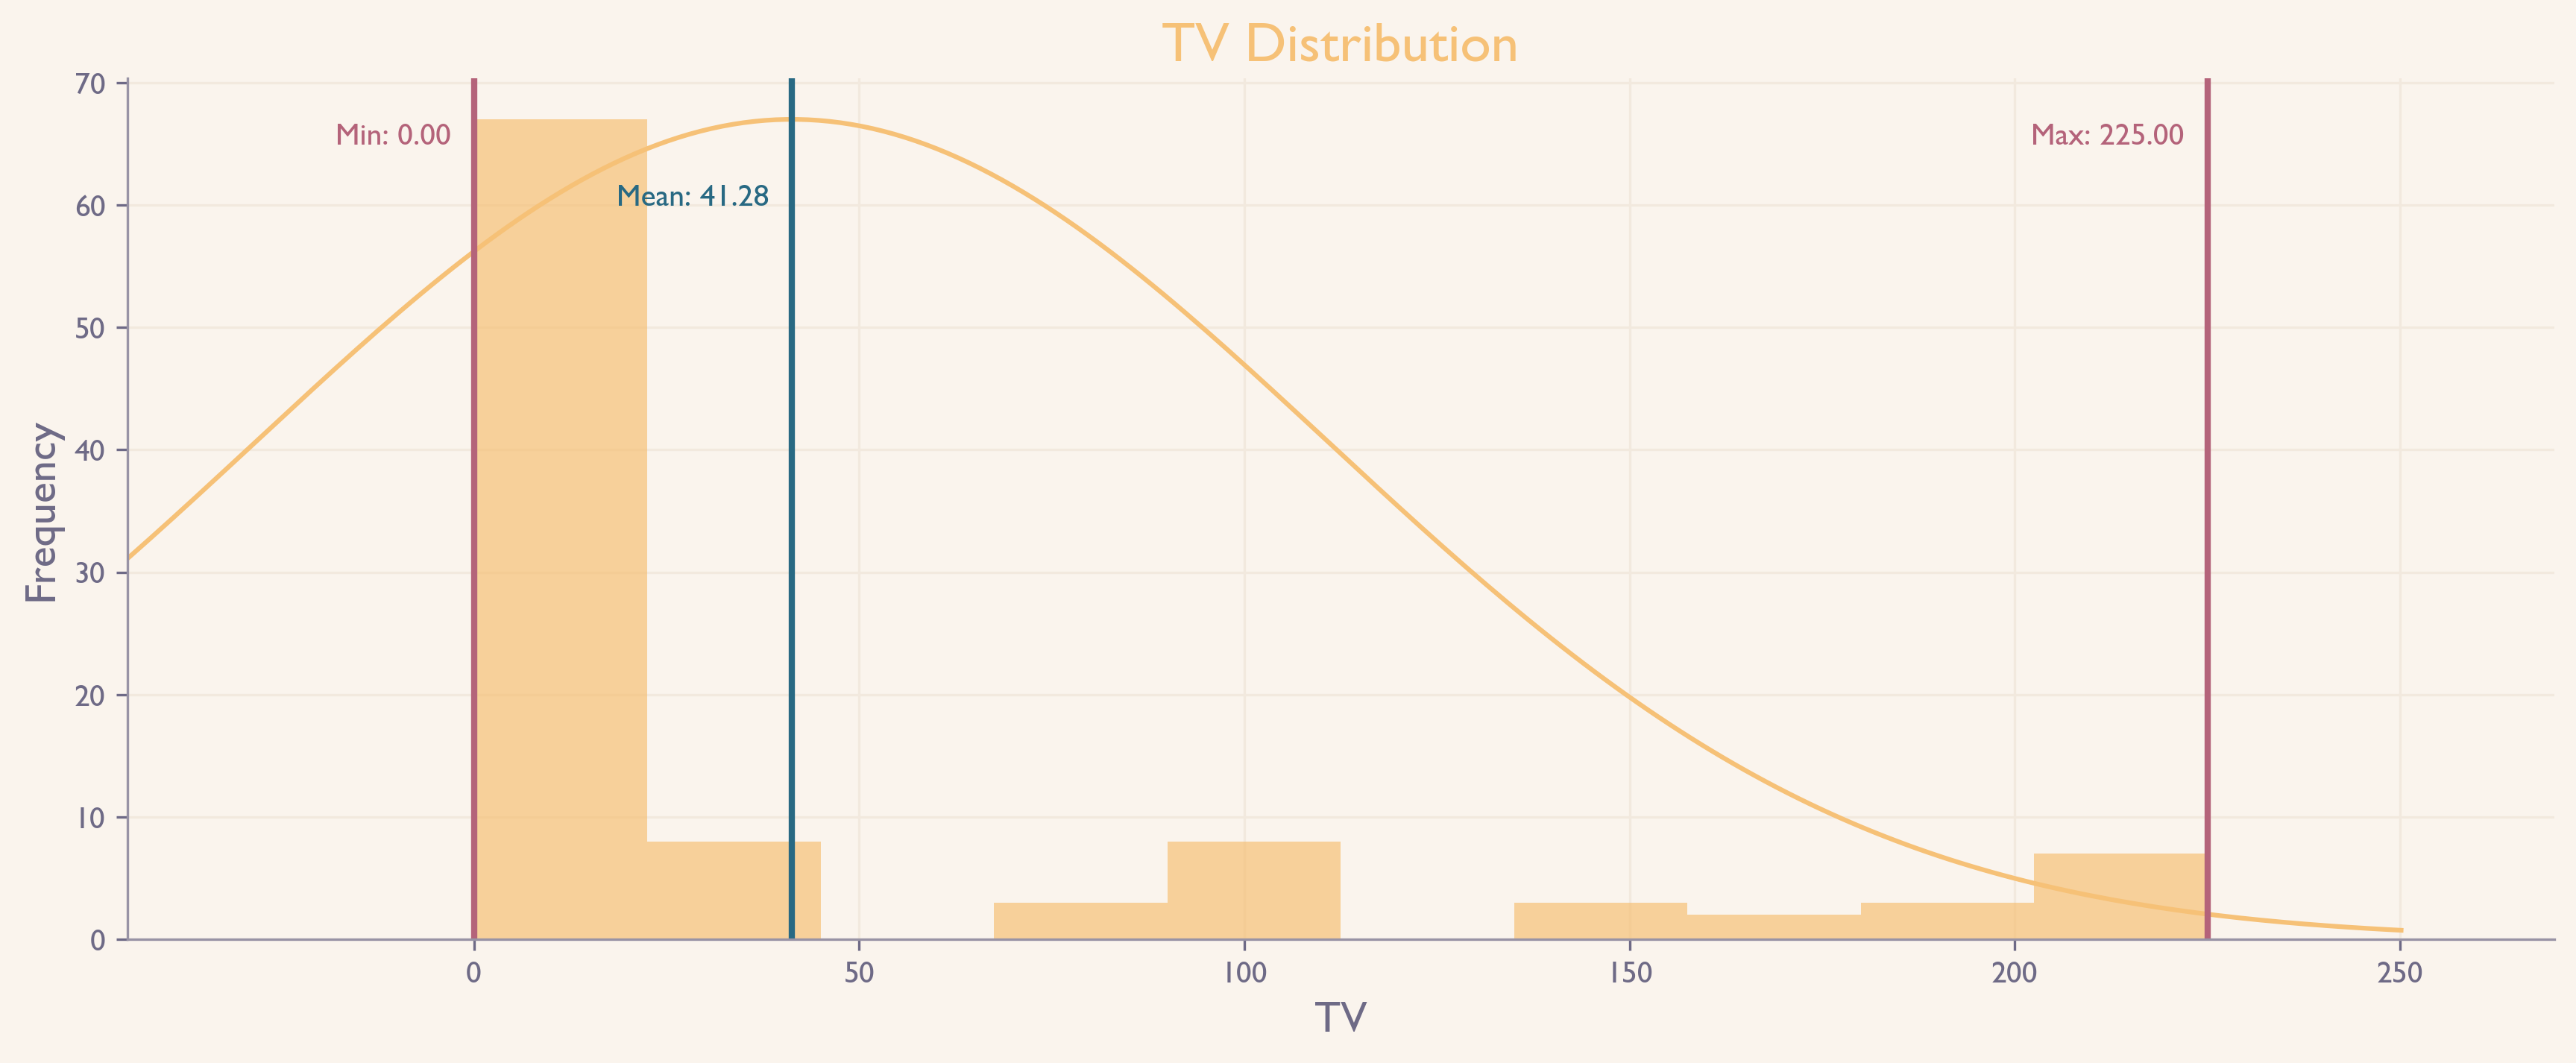

In [10]:
# Apply styles and fonts
plt.style.use("rose-pine-dawn")
plt.rcParams["font.family"] = "Gill Sans"
plt.rcParams["figure.dpi"] = 300

# Create figure
plt.figure(figsize=(14, 5))
ax = plt.gca()

# Plot histogram
n, bins, patches = plt.hist(df["TV"], bins=10, color="#f6c177", alpha=0.7)

# Calculate statistics
min_value = df["TV"].min()
max_value = df["TV"].max()
mean_value = df["TV"].mean()
std_dev = df["TV"].std()

# Overlay line chart
num_std_dev = (
    3  # Number of standard deviations to include on either side of the mean
)
x_min_gauss = mean_value - num_std_dev * std_dev
x_max_gauss = mean_value + num_std_dev * std_dev
x_gauss = np.linspace(x_min_gauss, x_max_gauss, 300)
y_gauss = stats.norm.pdf(x_gauss, mean_value, std_dev)

# Adjust the scaling of the Gaussian curve to fit the histogram
hist_max_height = max(n)  # Maximum height of the histogram
gauss_max_height = max(y_gauss)  # Maximum height of the Gaussian curve
scaling_factor = hist_max_height / gauss_max_height
ax.plot(x_gauss, y_gauss * scaling_factor, color="#f6c177")

# Set limits and title
x_pad = (max_value - min_value) * 0.2  # 20% padding
x_min, x_max = min_value - x_pad, max_value + x_pad
plt.xlim(x_min, x_max)

# Draw lines for min, max, and mean
plt.axvline(min_value, color="#b4637a", linestyle="-", lw=2)
plt.axvline(max_value, color="#b4637a", linestyle="-", lw=2)
plt.axvline(mean_value, color="#286983", linestyle="-", lw=2)

# Annotations for min, max, and mean
ax.annotate(
    f"Min: {min_value:.2f}",
    xy=(min_value, 5),
    xytext=(min_value - 3, 65),
    ha="right",
    color="#b4637a",
)
ax.annotate(
    f"Max: {max_value:.2f}",
    xy=(max_value, 5),
    xytext=(max_value - 3, 65),
    ha="right",
    color="#b4637a",
)
ax.annotate(
    f"Mean: {mean_value:.2f}",
    xy=(mean_value, 5),
    xytext=(mean_value - 3, 60),
    ha="right",
    color="#286983",
)

# Set labels and grid
ax.set_xlabel("TV", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.grid(True)

plt.title("TV Distribution", fontsize=18, color="#f6c177")

# Show the plot
plt.show()

### 1.4 Radio Distribution

Similarly, for radio distribution; the maximum reach was between 0 and 20, the average being 80.47 and the maximum GRP being 260.

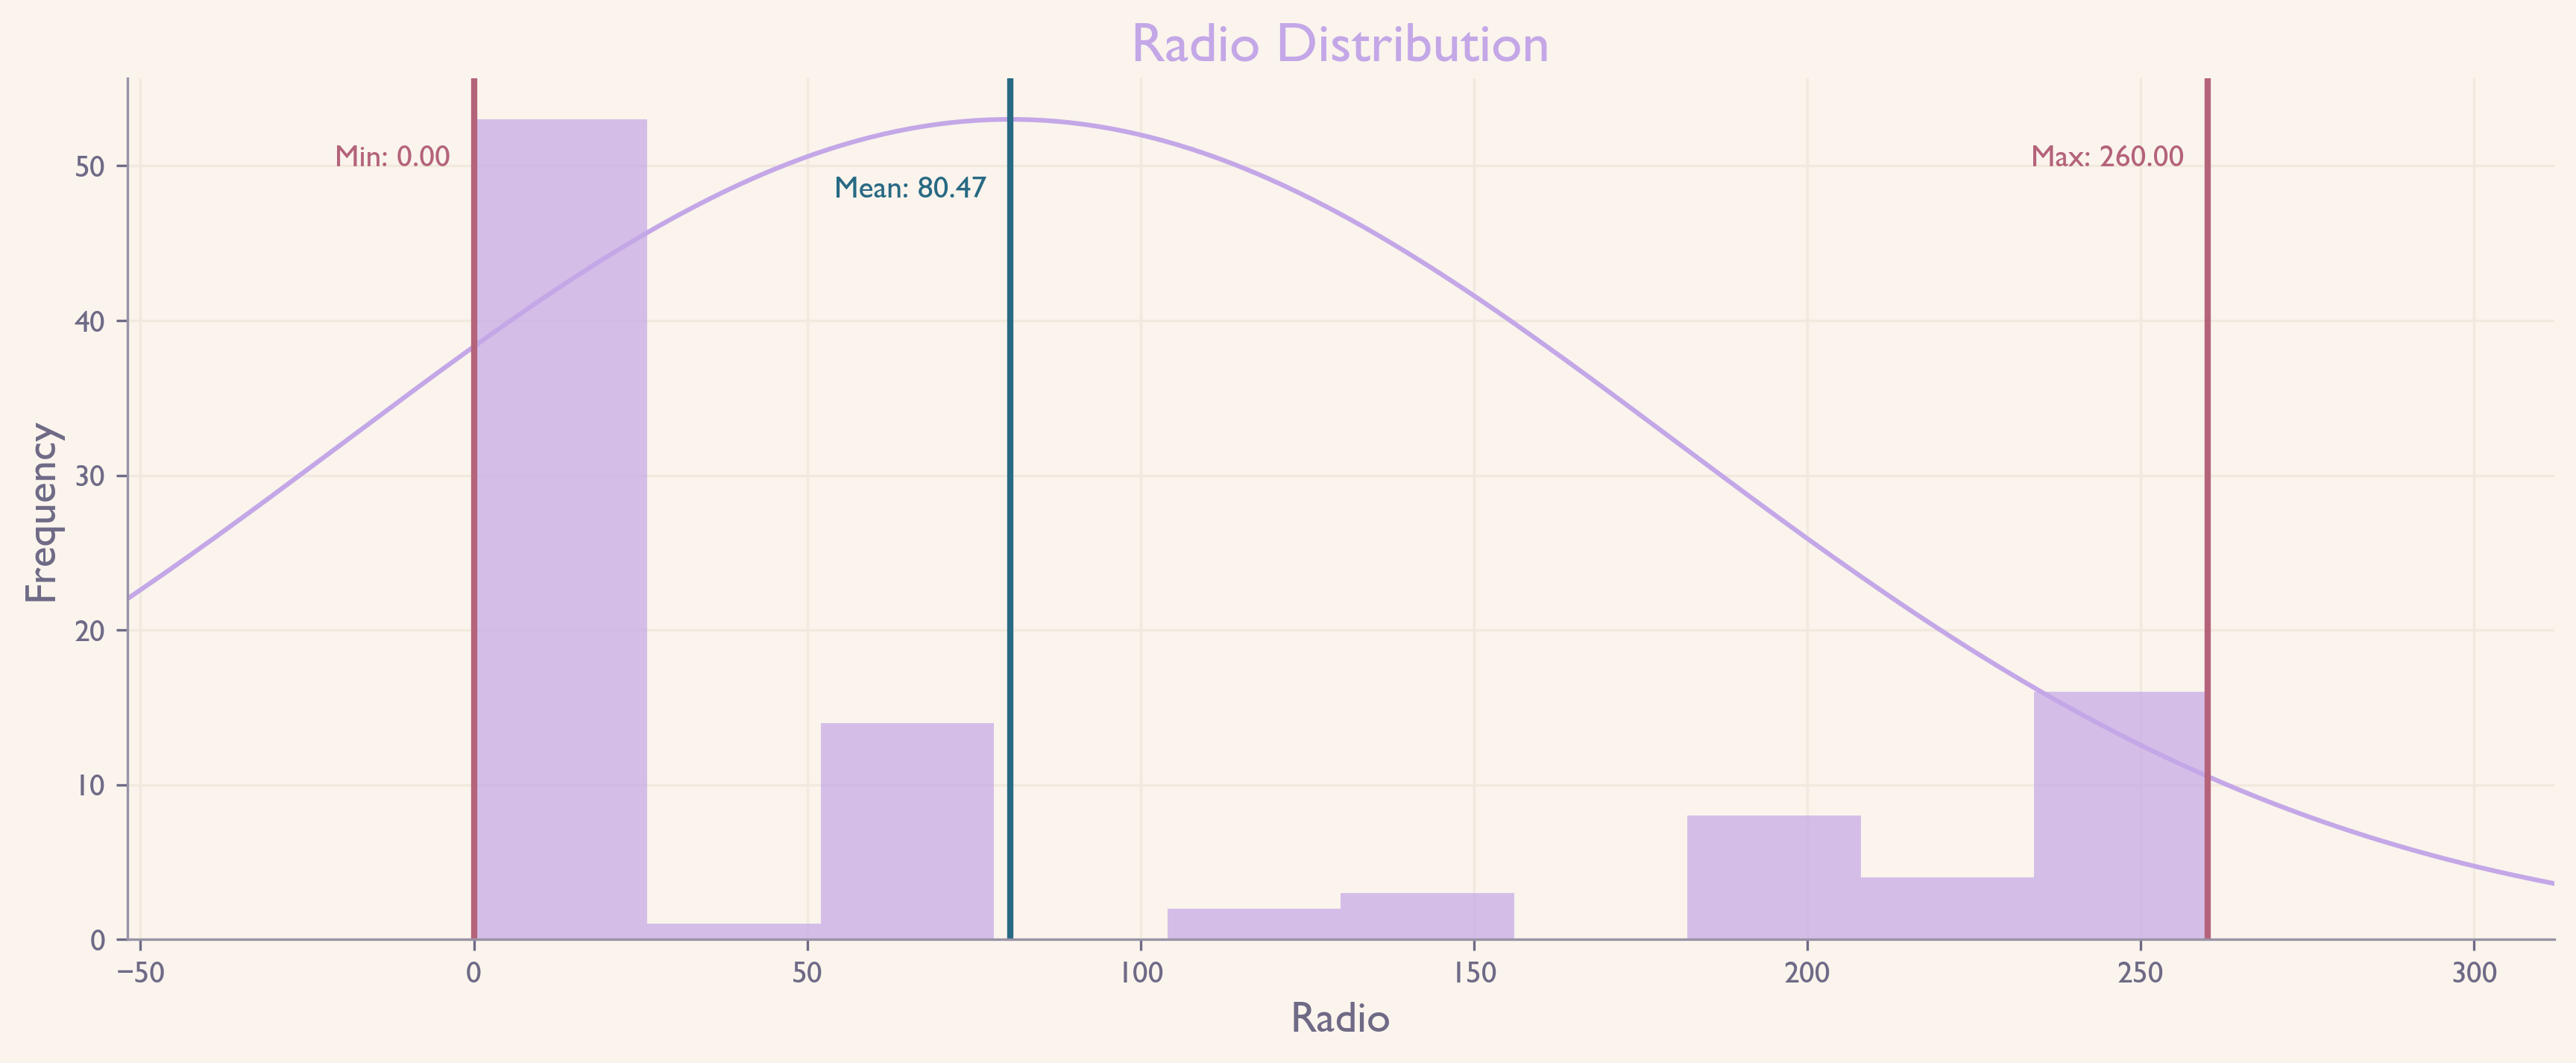

In [11]:
# Apply styles and fonts
plt.style.use("rose-pine-dawn")
plt.rcParams["font.family"] = "Gill Sans"
plt.rcParams["figure.dpi"] = 300

# Create figure
plt.figure(figsize=(14, 5))
ax = plt.gca()

# Plot histogram
n, bins, patches = plt.hist(df["Radio"], bins=10, color="#c4a7e7", alpha=0.7)

# Calculate statistics
min_value = df["Radio"].min()
max_value = df["Radio"].max()
mean_value = df["Radio"].mean()
std_dev = df["Radio"].std()

# Overlay line chart
num_std_dev = (
    3  # Number of standard deviations to include on either side of the mean
)
x_min_gauss = mean_value - num_std_dev * std_dev
x_max_gauss = mean_value + num_std_dev * std_dev
x_gauss = np.linspace(x_min_gauss, x_max_gauss, 300)
y_gauss = stats.norm.pdf(x_gauss, mean_value, std_dev)

# Adjust the scaling of the Gaussian curve to fit the histogram
hist_max_height = max(n)  # Maximum height of the histogram
gauss_max_height = max(y_gauss)  # Maximum height of the Gaussian curve
scaling_factor = hist_max_height / gauss_max_height
ax.plot(x_gauss, y_gauss * scaling_factor, color="#c4a7e7")

# Set limits and title
x_pad = (max_value - min_value) * 0.2  # 20% padding
x_min, x_max = min_value - x_pad, max_value + x_pad
plt.xlim(x_min, x_max)

# Draw lines for min, max, and mean
plt.axvline(min_value, color="#b4637a", linestyle="-", lw=2)
plt.axvline(max_value, color="#b4637a", linestyle="-", lw=2)
plt.axvline(mean_value, color="#286983", linestyle="-", lw=2)

# Annotations for min, max, and mean
ax.annotate(
    f"Min: {min_value:.2f}",
    xy=(min_value, 5),
    xytext=(min_value - 3.5, 50),
    ha="right",
    color="#b4637a",
)
ax.annotate(
    f"Max: {max_value:.2f}",
    xy=(max_value, 5),
    xytext=(max_value - 3.5, 50),
    ha="right",
    color="#b4637a",
)
ax.annotate(
    f"Mean: {mean_value:.2f}",
    xy=(mean_value, 5),
    xytext=(mean_value - 3.5, 48),
    ha="right",
    color="#286983",
)

# Set labels and grid
ax.set_xlabel("Radio", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)
ax.grid(True)

plt.title("Radio Distribution", fontsize=18, color="#c4a7e7")

# Show the plot
plt.show()

---

## Q2. Regression Analysis

### Sales vs Fuel Volume

Lets explore the relation between Sales and fuel volume; the R squared value obtained is 0.375 and the adjusted R squared is 0.369. Accordingly, this indicates that there are strong multi-collinearities and the sales and fuel volume are not entirely correlated.

### A Little Brief on the Regression Model used

OLS Regression is a simple way to see how one or more factors (independent variables) predict a specific outcome (dependent variable). It tries to draw a line (or a plane in more complex cases) that best matches the data by making the sum of the squares of the differences between the actual and predicted values as small as possible. This technique is often used in fields like economics, finance, and science to make predictions and analyze data.

The main parts of OLS regression are:

- **Dependent Variable (Y)**: What you want to predict.
- **Independent Variables (X)**: What you think will affect Y.
- **Regression Coefficients (β)**: How much a one-unit change in X is expected to change Y.

The formula looks like this:

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n + \epsilon $$

- $Y$ is what you're predicting,
- $X_1, X_2, ..., X_n$ are the factors you're considering,
- $\beta_0$ is the starting point when all Xs are zero,
- $\beta_1, \beta_2, ..., \beta_n$ show how much Y changes with each X,
- $\epsilon$ is the error term, the difference between actual and predicted Y.

OLS works by adjusting the $\beta$ values to make the error (difference between actual and predicted Y) as small as possible across all data points. It gives tools to check how well the model fits, like R-squared and tests for each $\beta$'s significance.

### In simple terms...

Imagine you're testing how the slope of a ramp and the force you use to push a toy car affect how far it travels. You conduct experiments, changing one factor at a time and measuring the distance.

OLS Regression acts like an expert assistant, analyzing your experiments. Once you're done, you share your observations with it, suggesting that both the slope and the push influence the car's distance. The assistant then applies a mathematical technique to plot a line that best represents the relationship between these factors and the car's distance.

This line is positioned so that the sum of the squares of the distances between the actual jumps of the cars and where the line predicts they should land is minimized. This ensures the line accurately reflects the impact of each factor.

Finally, the assistant interprets the data, telling you how changing the slope or the force alters the car's distance. This insight helps you understand the precise effect of each variable, much like how OLS Regression is used in real life to determine how various factors influence outcomes, such as sales or game scores.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     59.52
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           9.73e-12
Time:                        19:03:25   Log-Likelihood:                -907.25
No. Observations:                 101   AIC:                             1818.
Df Residuals:                      99   BIC:                             1824.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.749e+04   5259.953     -3.325      0.001   -2.79e+04   -7052.822
Q('Fuel Volume')     0.6452      0.084      7.715      0.000       0.479       0.811
==============================================================================
Omnibus:                        2.182   Durbin-Watson:                   0.889
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.545
Skew:                           0.060   Prob(JB):                        0.462
Kurtosis:                       2.406   Cond. No.                     1.71e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

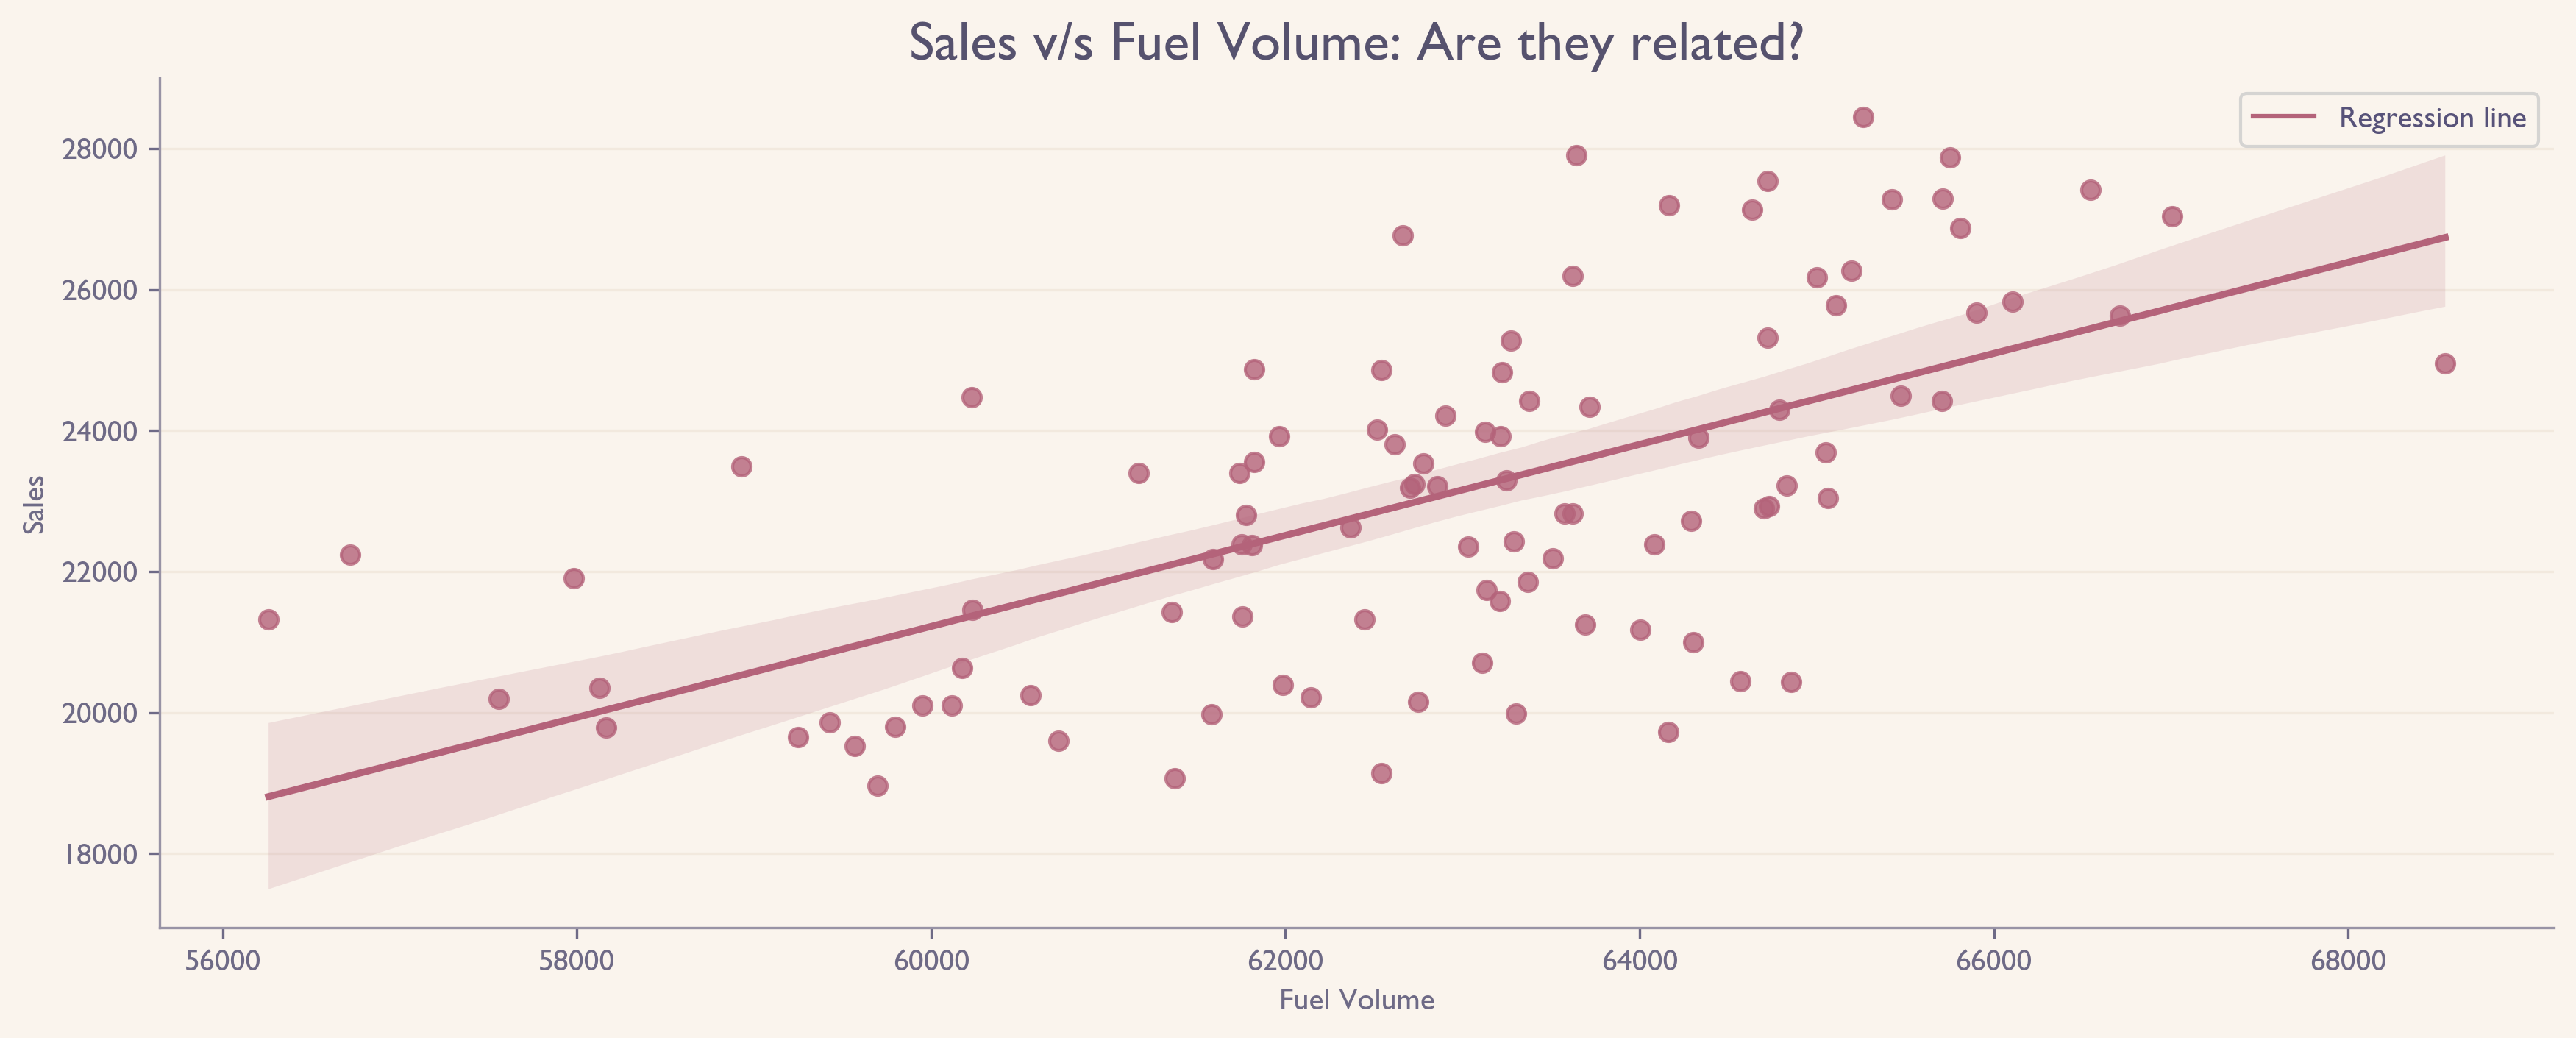

In [12]:
# Apply styles and fonts
plt.style.use("rose-pine-dawn")
plt.rcParams["font.family"] = "Gill Sans"
plt.rcParams["figure.dpi"] = 300

# Create figure
plt.figure(figsize=(14, 5))

plt.title(
    "Sales v/s Fuel Volume: Are they related?", fontsize=18, color="#56526e"
)

# Define the model
model = ols("Sales ~ Q('Fuel Volume')", data=df).fit()

# Analyze the results
display(model.summary())

# Optional: Plotting for visual analysis
sns.regplot(x="Fuel Volume", y="Sales", data=df, fit_reg=True)

red_line = mlines.Line2D([], [], color="#b4637a", label="Regression line")
plt.legend(handles=[red_line])

plt.show()

### a. Finding statistically significant relationship between c-store sales and fuel volume

To determine if there's a statistically significant relationship between convenience store (c-store) sales and fuel volume, we've conducted a regression analysis above. Here are the key findings structured for clarity:

1. **R-squared (R²) Analysis:**
   - **Value:** 0.375
   - **What It Means:** The R-squared value measures how well the independent variable (in this case, fuel volume) predicts the dependent variable (sales). With an R² of 0.375, we learn that 37.5% of the variability in sales can be explained by changes in fuel volume. This indicates a moderate association between fuel volume and sales. However, it also suggests that other factors not accounted for in this model contribute to the sales variability.

2. **Analysis of Coefficients:**
   - **Intercept (const) Coefficient:** The intercept is -17490, with a highly significant p-value (< 0.001). The intercept represents the expected sales when fuel volume is zero, which is more of a theoretical value in this context since it's unlikely for sales to exist without any fuel volume.
   - **Fuel Volume Coefficient:** The coefficient for fuel volume is 0.6452, also with a highly significant p-value (< 0.001). This indicates a positive and significant relationship between fuel volume and sales; for every unit increase in fuel volume, sales are expected to increase by approximately 0.6452 units, assuming all other factors remain constant.

The statistical analysis reveals a significant positive relationship between fuel volume and c-store sales, confirming that as fuel volume increases, sales tend to increase as well. The R² value indicates that fuel volume is a meaningful predictor of sales, but it also highlights the existence of other significant factors affecting sales that the model does not capture. The significant p-values for both the intercept and fuel volume coefficient reinforce the reliability of these findings.

### b. Providing estimates for average c-store sales in the data set for varying fuel volume levels

The following shows the Sales figures for the smallest, average and largest fuel volumes sold.

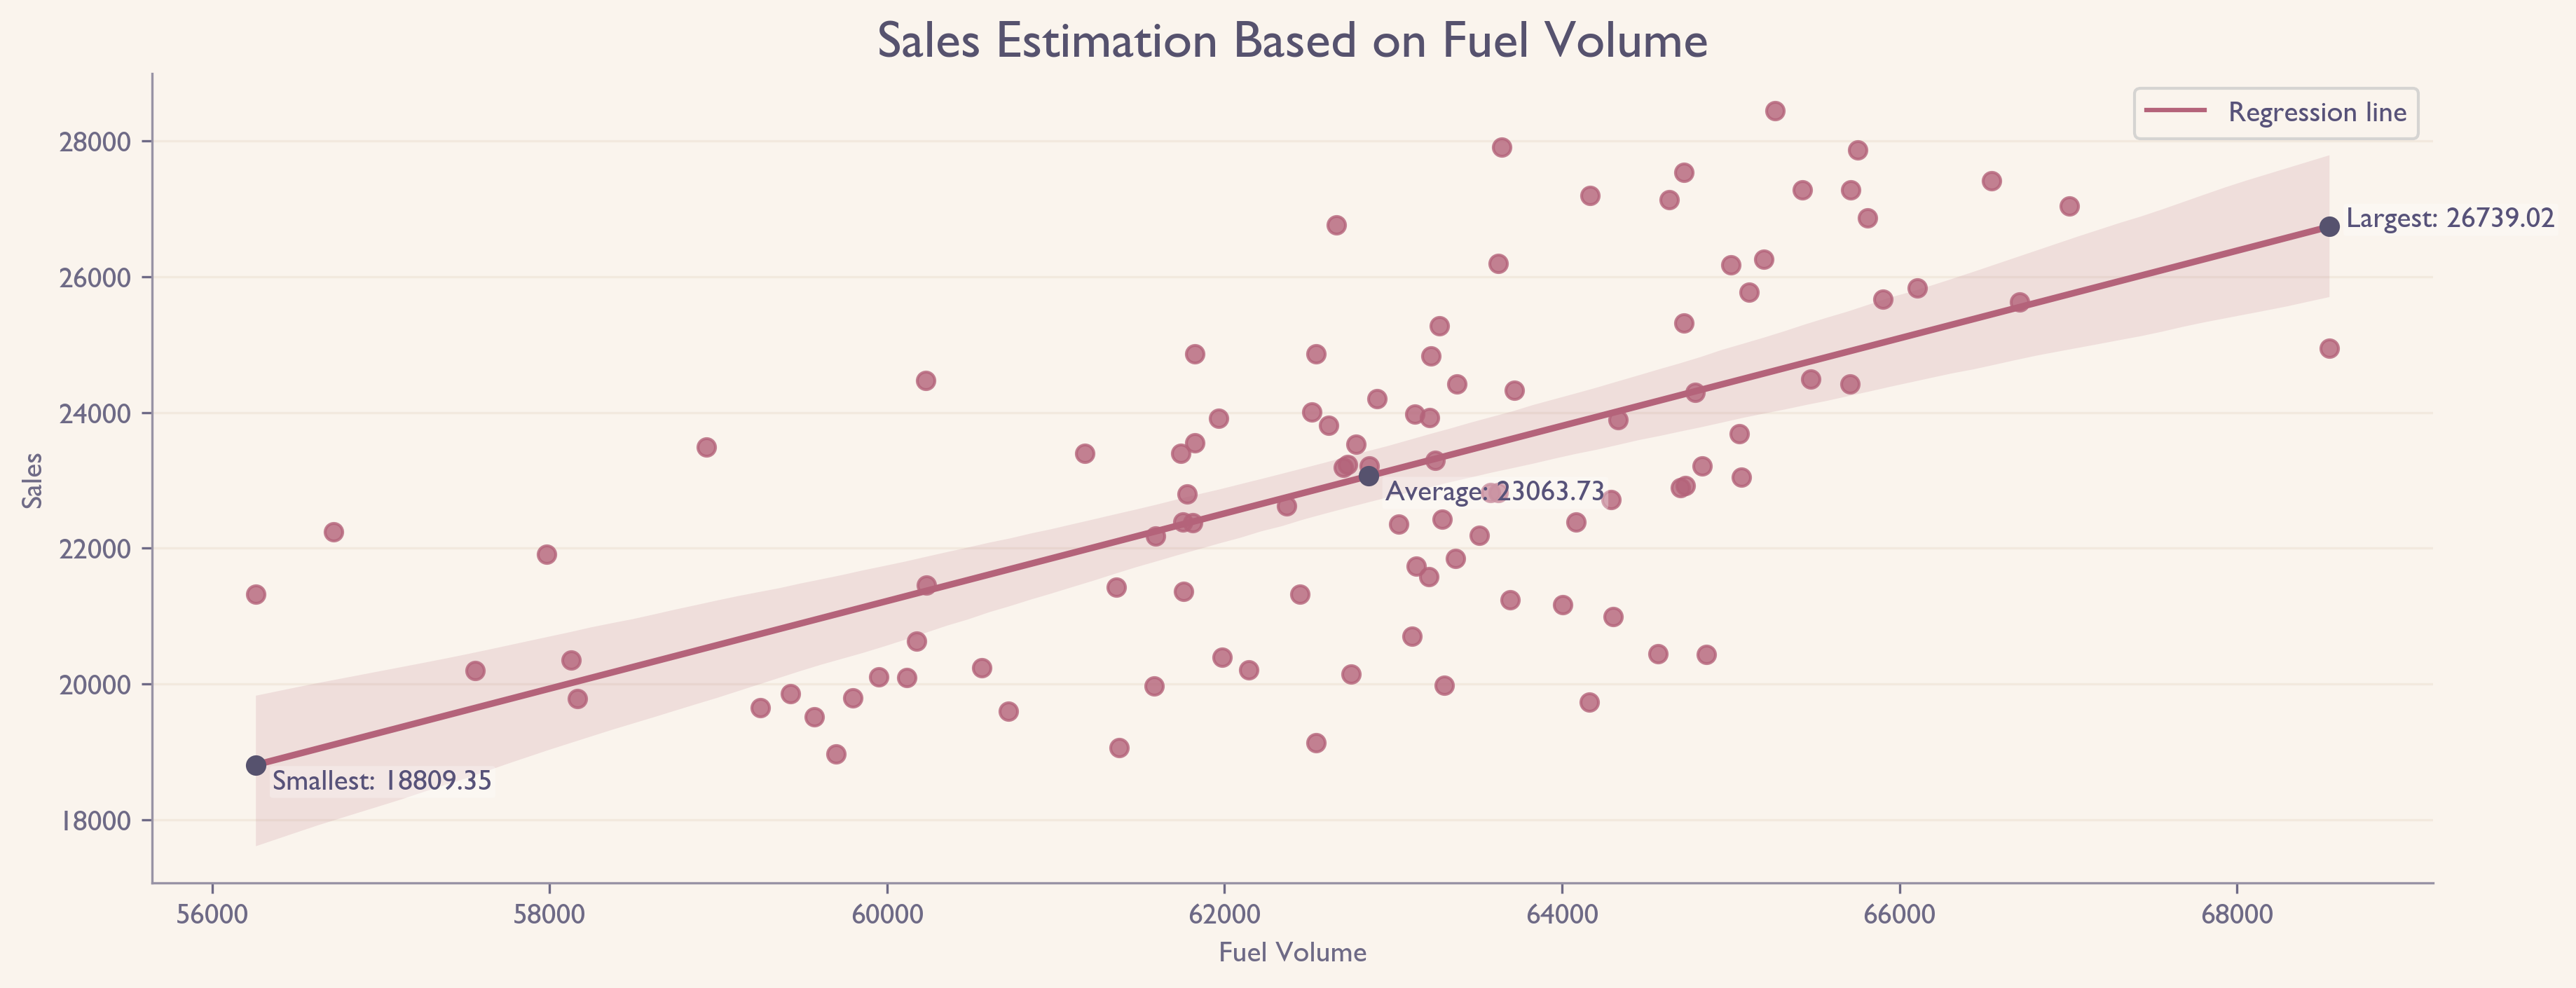

In [13]:
# Apply styles and fonts
plt.style.use("rose-pine-dawn")
plt.rcParams["font.family"] = "Gill Sans"
plt.rcParams["figure.dpi"] = 300

# Create figure
plt.figure(figsize=(14, 5))

plt.title(
    "Sales Estimation Based on Fuel Volume", fontsize=18, color="#56526e"
)

sns.regplot(x="Fuel Volume", y="Sales", data=df, fit_reg=True)

# Identifying the key fuel volume levels
smallest_fuel_volume = df["Fuel Volume"].min()
average_fuel_volume = df["Fuel Volume"].mean()
largest_fuel_volume = df["Fuel Volume"].max()


def estimate_sales(fuel_volume):
    # Create a DataFrame because the model expects it
    new_data = pd.DataFrame({"Fuel Volume": [fuel_volume]})
    return model.predict(new_data)[0]


estimated_sales_smallest = estimate_sales(smallest_fuel_volume)
estimated_sales_average = estimate_sales(average_fuel_volume)
estimated_sales_largest = estimate_sales(largest_fuel_volume)

# Plotting these points on the graph
plt.scatter(
    [smallest_fuel_volume, average_fuel_volume, largest_fuel_volume],
    [
        estimated_sales_smallest,
        estimated_sales_average,
        estimated_sales_largest,
    ],
    color="#56526e",
    zorder=3,
)

# Adding labels for clarity
plt.text(
    smallest_fuel_volume + 100,
    estimated_sales_smallest - 350,
    f"Smallest: {estimated_sales_smallest:.2f}",
    bbox=dict(
        facecolor="white",
        alpha=0.3,
        edgecolor="none",
        boxstyle="round,pad=0.1",
    ),
)
plt.text(
    average_fuel_volume + 100,
    estimated_sales_average - 350,
    f"Average: {estimated_sales_average:.2f}",
    bbox=dict(
        facecolor="white",
        alpha=0.3,
        edgecolor="none",
        boxstyle="round,pad=0.1",
    ),
)
plt.text(
    largest_fuel_volume + 100,
    estimated_sales_largest,
    f"Largest: {estimated_sales_largest:.2f}",
    bbox=dict(
        facecolor="white",
        alpha=0.3,
        edgecolor="none",
        boxstyle="round,pad=0.1",
    ),
)

red_line = mlines.Line2D([], [], color="#b4637a", label="Regression line")
plt.legend(handles=[red_line])

plt.show()

### c. Looking at the 95% confidence interval for smallest, average and largest fuel volumes sold

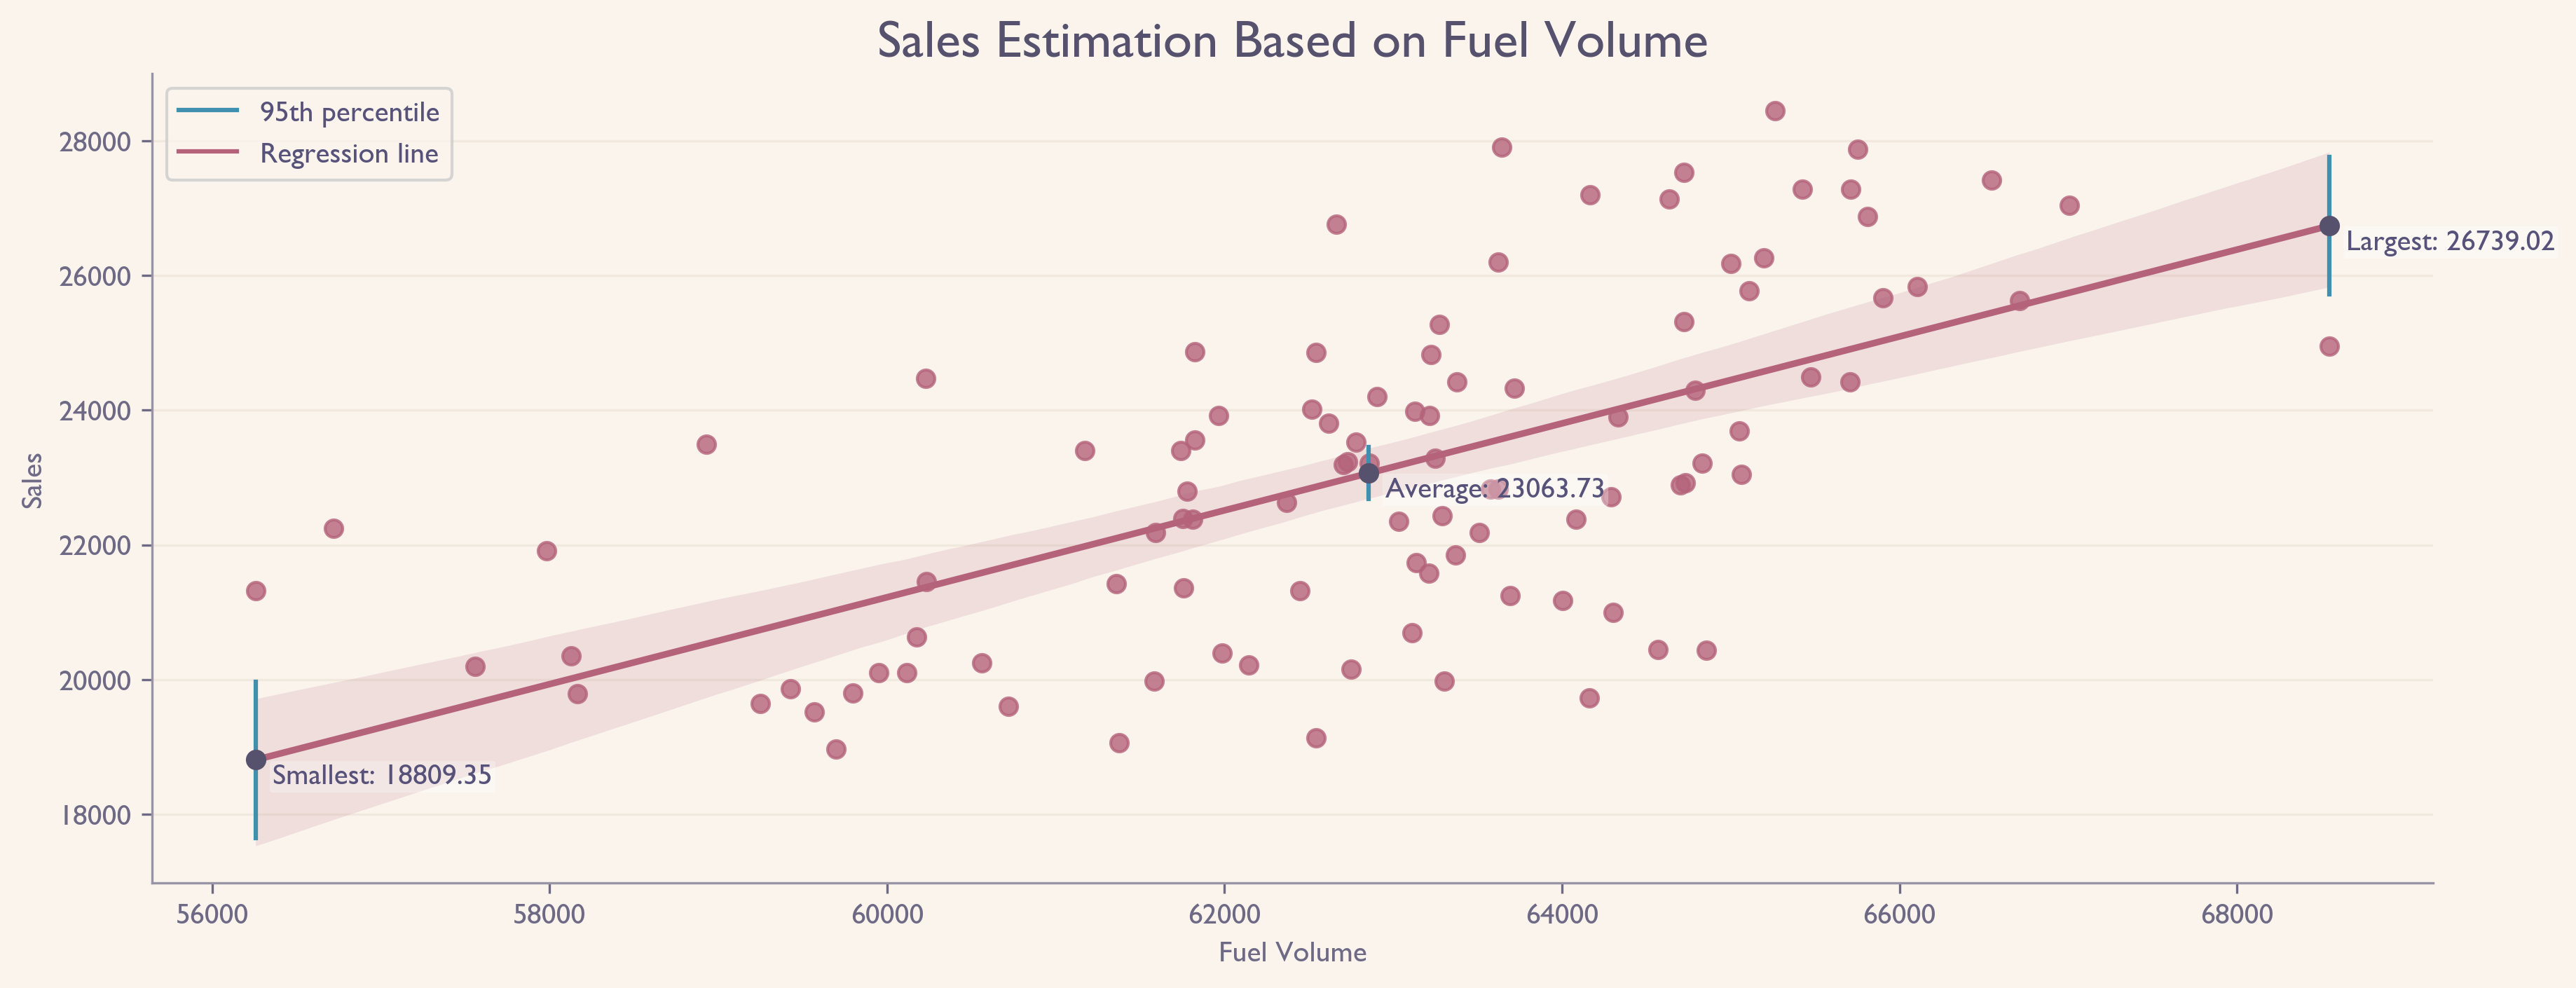

In [14]:
# Apply styles and fonts
plt.style.use("rose-pine-dawn")
plt.rcParams["font.family"] = "Gill Sans"
plt.rcParams["figure.dpi"] = 300

# Create figure
plt.figure(figsize=(14, 5))

plt.title(
    "Sales Estimation Based on Fuel Volume", fontsize=18, color="#56526e"
)

# Create the regression plot
sns.regplot(x="Fuel Volume", y="Sales", data=df, fit_reg=True)


# Function to get the 95% prediction interval
def get_prediction_interval(fuel_volume):
    new_data = pd.DataFrame({"Fuel Volume": [fuel_volume]})
    prediction = model.get_prediction(new_data)
    return prediction.conf_int(alpha=0.05)  # 95% interval


# Plotting points and intervals
for fuel_volume, label in zip(
    [smallest_fuel_volume, average_fuel_volume, largest_fuel_volume],
    ["Smallest", "Average", "Largest"],
):
    estimated_sales = estimate_sales(fuel_volume)
    interval = get_prediction_interval(fuel_volume)

    # Plot the point
    plt.scatter(
        fuel_volume,
        estimated_sales,
        color="#56526e",
        zorder=3,
    )
    plt.text(
        fuel_volume + 100,
        estimated_sales - 350,
        f'{label}: {estimated_sales:.2f}',
        bbox=dict(
            facecolor="white",
            alpha=0.3,
            edgecolor="none",
            boxstyle="round,pad=0.1",
        ),
    )

    # Plot the interval
    plt.plot(
        [fuel_volume, fuel_volume],
        [interval[0][0], interval[0][1]],
        color="#3e8fb0",
    )


green_line = mlines.Line2D([], [], color="#3e8fb0", label="95th percentile")
red_line = mlines.Line2D([], [], color="#b4637a", label="Regression line")
plt.legend(handles=[green_line, red_line])

plt.show()

#### d. Comments on the Interval Widths

The widths of the intervals in the plot represent the uncertainty or variability of the sales estimates at different fuel volumes. A wider interval indicates a higher degree of uncertainty in the estimate, while a narrower interval indicates a lower degree of uncertainty. This is often referred to as the prediction interval in regression analysis. In this case, a 95% prediction interval is used, which means that 95% of the time, the true sales value will fall within this interval given a certain fuel volume.

---

## Q3. Analysing the relationship between TV/Radio and Sales

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     16.72
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           5.67e-07
Time:                        19:03:26   Log-Likelihood:                -916.20
No. Observations:                 101   AIC:                             1838.
Df Residuals:                      98   BIC:                             1846.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.214e+04    275.018     80.513      0.000    2.16e+04    2.27e+04
TV            12.1927      3.874      3.147      0.002       4.504      19.881
Radio          5.1953      2.700      1.924      0.057      -0.163      10.554
==============================================================================
Omnibus:                        4.413   Durbin-Watson:                   0.953
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                2.620
Skew:                           0.174   Prob(JB):                        0.270
Kurtosis:                       2.291   Cond. No.                         185.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

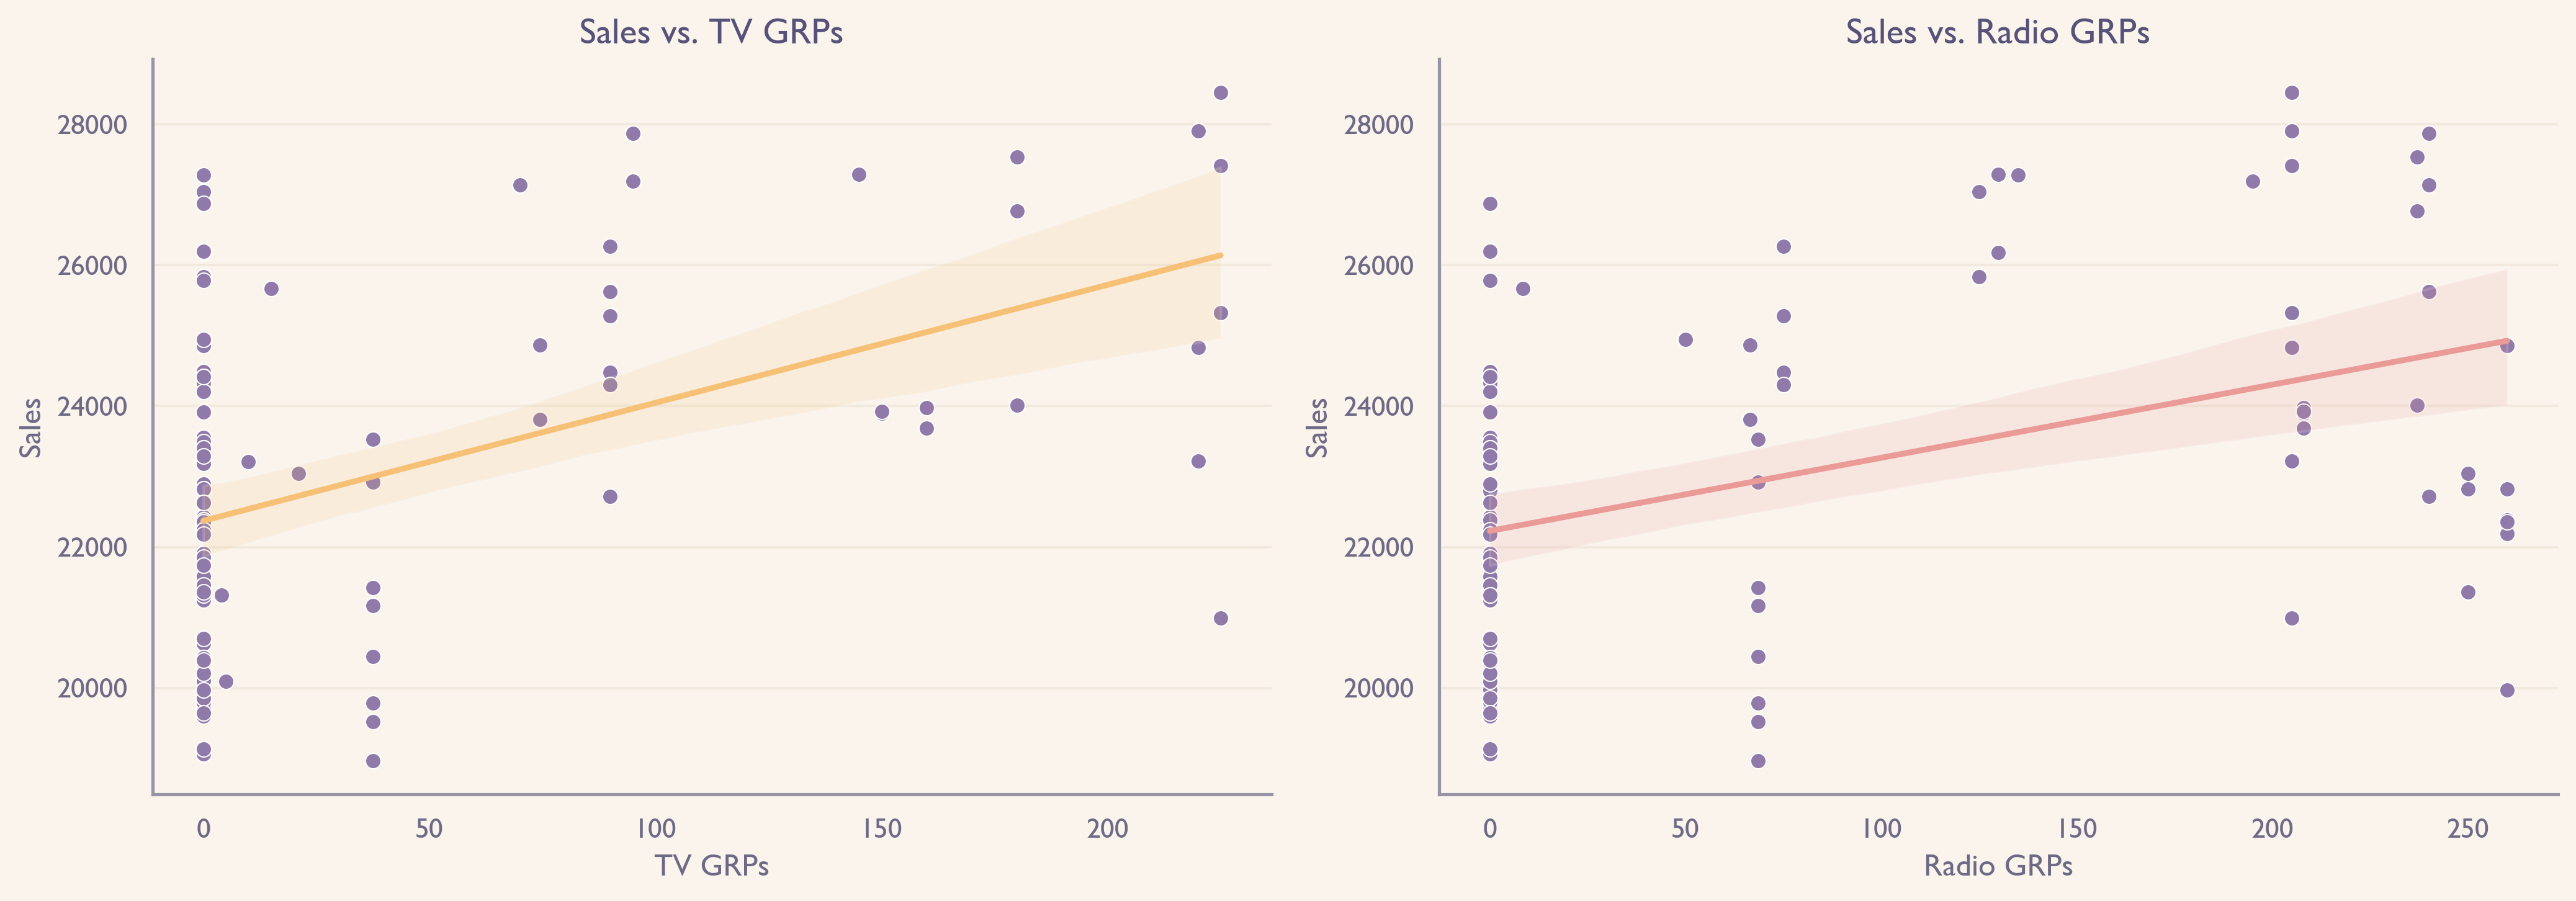

In [15]:
model = ols("Sales ~ TV + Radio", data=df).fit()

# Print the summary of the regression
display(model.summary())

# Setting style for the plots
sns.set(style="whitegrid")

plt.style.use("rose-pine-dawn")
plt.rcParams["font.family"] = "Gill Sans"
plt.rcParams["figure.dpi"] = 300

# Creating a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Plotting Sales vs. TV GRPs
sns.scatterplot(x="TV", y="Sales", data=df, ax=ax[0], color="#907aa9")
sns.regplot(
    x="TV", y="Sales", data=df, scatter=False, ax=ax[0], color="#f6c177"
)
ax[0].set_title("Sales vs. TV GRPs", fontsize=14)
ax[0].set_xlabel("TV GRPs")
ax[0].set_ylabel("Sales")

# Plotting Sales vs. Radio GRPs
sns.scatterplot(x="Radio", y="Sales", data=df, ax=ax[1], color="#907aa9")
sns.regplot(
    x="Radio", y="Sales", data=df, scatter=False, ax=ax[1], color="#ea9a97"
)
ax[1].set_title("Sales vs. Radio GRPs", fontsize=14)
ax[1].set_xlabel("Radio GRPs")
ax[1].set_ylabel("Sales")

plt.tight_layout()
plt.show()

### a. Statistically significance of advertising variables on c-store sales

To answer the question regarding the impact of two advertising variables, TV and Radio GRPs, on convenience store sales, let's delve into the results from our regression analysis:

1. **TV Advertising (TV GRPs):**
   - The analysis shows a coefficient of 12.19 for TV GRPs, with a p-value of 0.002. This p-value is below the standard threshold of 0.05, indicating a statistically significant effect of TV advertising on sales. Specifically, it suggests that for every unit increase in TV GRPs, convenience store sales increase by approximately 12.19 units, assuming radio advertising remains constant. This finding highlights the effectiveness of TV advertising in driving sales for convenience stores.

2. **Radio Advertising (Radio GRPs):**
   - For Radio GRPs, the coefficient is 5.20, with a p-value of 0.057. This p-value is slightly above the 0.05 threshold, suggesting that the influence of radio advertising on sales is not statistically significant within the conventional confidence level. In practical terms, this means that while there's an indicated positive relationship between radio advertising and sales, the evidence is not strong enough to conclusively state that radio advertising significantly impacts sales when TV advertising's effect is accounted for.

In conclusion, the analysis clearly shows that TV advertising significantly impacts convenience store sales, reinforcing its role as a vital component of the marketing mix. On the other hand, the impact of radio advertising on sales does not meet the statistical significance threshold at the 0.05 level, leaving its effectiveness more ambiguous based on the current data. This distinction is crucial for making informed decisions about advertising strategies to enhance sales effectively.

In [17]:
tv_grps = 40
radio_grps = 80

estimated_sales = (
    model.params["Intercept"]
    + (model.params["TV"] * tv_grps)
    + (model.params["Radio"] * radio_grps)
)

print(f"Estimated sales with 40 TV GRPs and 80 radio GRPs: {estimated_sales}")


Estimated sales with 40 TV GRPs and 80 radio GRPs: 23045.71651360263


### b. Estimating c-store sales for a week with 40 TV GRPs and 80 radio GRPs

To estimate c-store sales for a week with 40 TV GRPs and 80 radio GRPs, we will use the regression model coefficients obtained from the analysis. The equation derived from our model is:

$$ \text{Sales} = \beta_0 + \beta_1(\text{TV}) + \beta_2(\text{Radio}) $$

where:
- $ \beta_0 $ is the constant term,
- $ \beta_1 $ is the coefficient for TV GRPs,
- $ \beta_2 $ is the coefficient for Radio GRPs.

Substituting the coefficients from our model and the specified values for TV and Radio GRPs, we can calculate the estimated sales. Let's proceed with this calculation.

The estimated c-store sales for a week with 40 TV GRPs and 80 radio GRPs is approximately **23,046 units**. This estimation is based on the regression model developed from the provided data, taking into account the statistical relationship between advertising efforts (TV and Radio GRPs) and sales outcomes.

In [18]:
predict_df = pd.DataFrame({"TV": [40], "Radio": [80]})
# Add a constant to the predictor DataFrame for the intercept
predict_df_with_const = sm.add_constant(predict_df)

# Use the model to predict the confidence interval
predictions = model.get_prediction(predict_df_with_const)
ci = predictions.conf_int()

# Display the confidence interval
ci_lower, ci_upper = ci[0]
print(f"Confidence Interval (Lower): {ci_lower}")
print(f"Confidence Interval (Upper): {ci_upper}")


Confidence Interval (Lower): 22623.549056059524
Confidence Interval (Upper): 23467.883971145737


### c. 95% Confidence Interval for Estimated Sales
The 95% confidence interval for the estimated c-store sales for a week with 40 TV GRPs and 80 radio GRPs ranges from approximately **€22,623.55** to **€23,467.88**.

In [19]:
# Given data
tv_grps = 40
radio_grps = 80
tv_grp_cost = 300  
radio_grp_cost = 25
profit_margin = 0.30
mf = 3  # Multiplication factor for long-term effects

# Calculate the cost of advertising
advertising_cost = (tv_grps * tv_grp_cost) + (radio_grps * radio_grp_cost)

# Calculate the overall revenue impact including the long-term effect
overall_revenue_impact = estimated_sales * mf

# Calculate the overall profit generated by c-store advertising
overall_profit = overall_revenue_impact * profit_margin

# Calculate the net impact of c-store advertising
net_impact = overall_profit - advertising_cost

print(f"Advertising Cost: ${advertising_cost}")
print(f"Overall Revenue Impact: ${overall_revenue_impact}")
print(f"Overall Profit: ${overall_profit}")
print(f"Net Impact: ${net_impact}")

Advertising Cost: $14000
Overall Revenue Impact: $69137.14954080789
Overall Profit: $20741.144862242367
Net Impact: $6741.144862242367


### d. Profitability of C-Store Advertising
To address Tyler's request for evidence on the profitability of convenience store (c-store) advertising, our analysis hinges on comparing the additional sales generated by advertising against the costs incurred. Utilizing regression coefficients for both TV and radio advertising, we can quantify the revenue boost from these advertising channels. By incorporating a multiplication factor for their prolonged impact and factoring in the c-store's 30% profit margin, we're positioned to calculate the net profitability of these advertising efforts.

For our case, the costs are outlined as follows: TV advertising at €300 per Gross Rating Point (GRP) in Marseille, with a plan to purchase 40 TV GRPs; radio advertising costs €25 per GRP, with an intention to buy 80 radio GRPs. Under these parameters, we've conducted an analysis to determine the net impact of advertising on c-store sales, considering a specified advertising strategy of 40 TV GRPs and 80 radio GRPs.

The findings from our analysis reveal a promising picture for the profitability of c-store advertising:
- **Advertising Costs:** The total investment for the specified advertising strategy amounts to **€14,000**.
- **Revenue Impact:** Including the long-term effects, advertising is projected to generate an overall revenue impact of **€69,137.15**.
- **Profit from Advertising:** Based on the 30% profit margin on c-store sales, the advertising efforts are expected to produce a profit of **€20,741.14**.
- **Net Impact:** After accounting for the advertising spend, the net impact stands at **€6,741.14**.

Given these results, our regression analysis supports the conclusion that advertising significantly enhances c-store sales, justifying the advertising expenditure with a positive net impact of **€6,741.14** for the specified period. This indicates that c-store advertising not only recoups its costs but also contributes to profitability, affirming its value as an investment under the examined conditions.

---

## Q4. Regression with Temperature as an additional variable

In [20]:
model_with_temp = ols("Sales ~ TV + Radio + Temp", data=df).fit()

display(model_with_temp.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     27.23
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           7.36e-13
Time:                        19:03:26   Log-Likelihood:                -900.17
No. Observations:                 101   AIC:                             1808.
Df Residuals:                      97   BIC:                             1819.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.919e+04    544.259     35.259      0.000    1.81e+04    2.03e+04
TV            11.2975      3.326      3.396      0.001       4.696      17.899
Radio          0.1646      2.462      0.067      0.947      -4.722       5.051
Temp         189.0806     31.413      6.019      0.000     126.734     251.428
==============================================================================
Omnibus:                        0.137   Durbin-Watson:                   1.076
Prob(Omnibus):                  0.934   Jarque-Bera (JB):                0.173
Skew:                           0.084   Prob(JB):                        0.917
Kurtosis:                       2.886   Cond. No.                         429.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

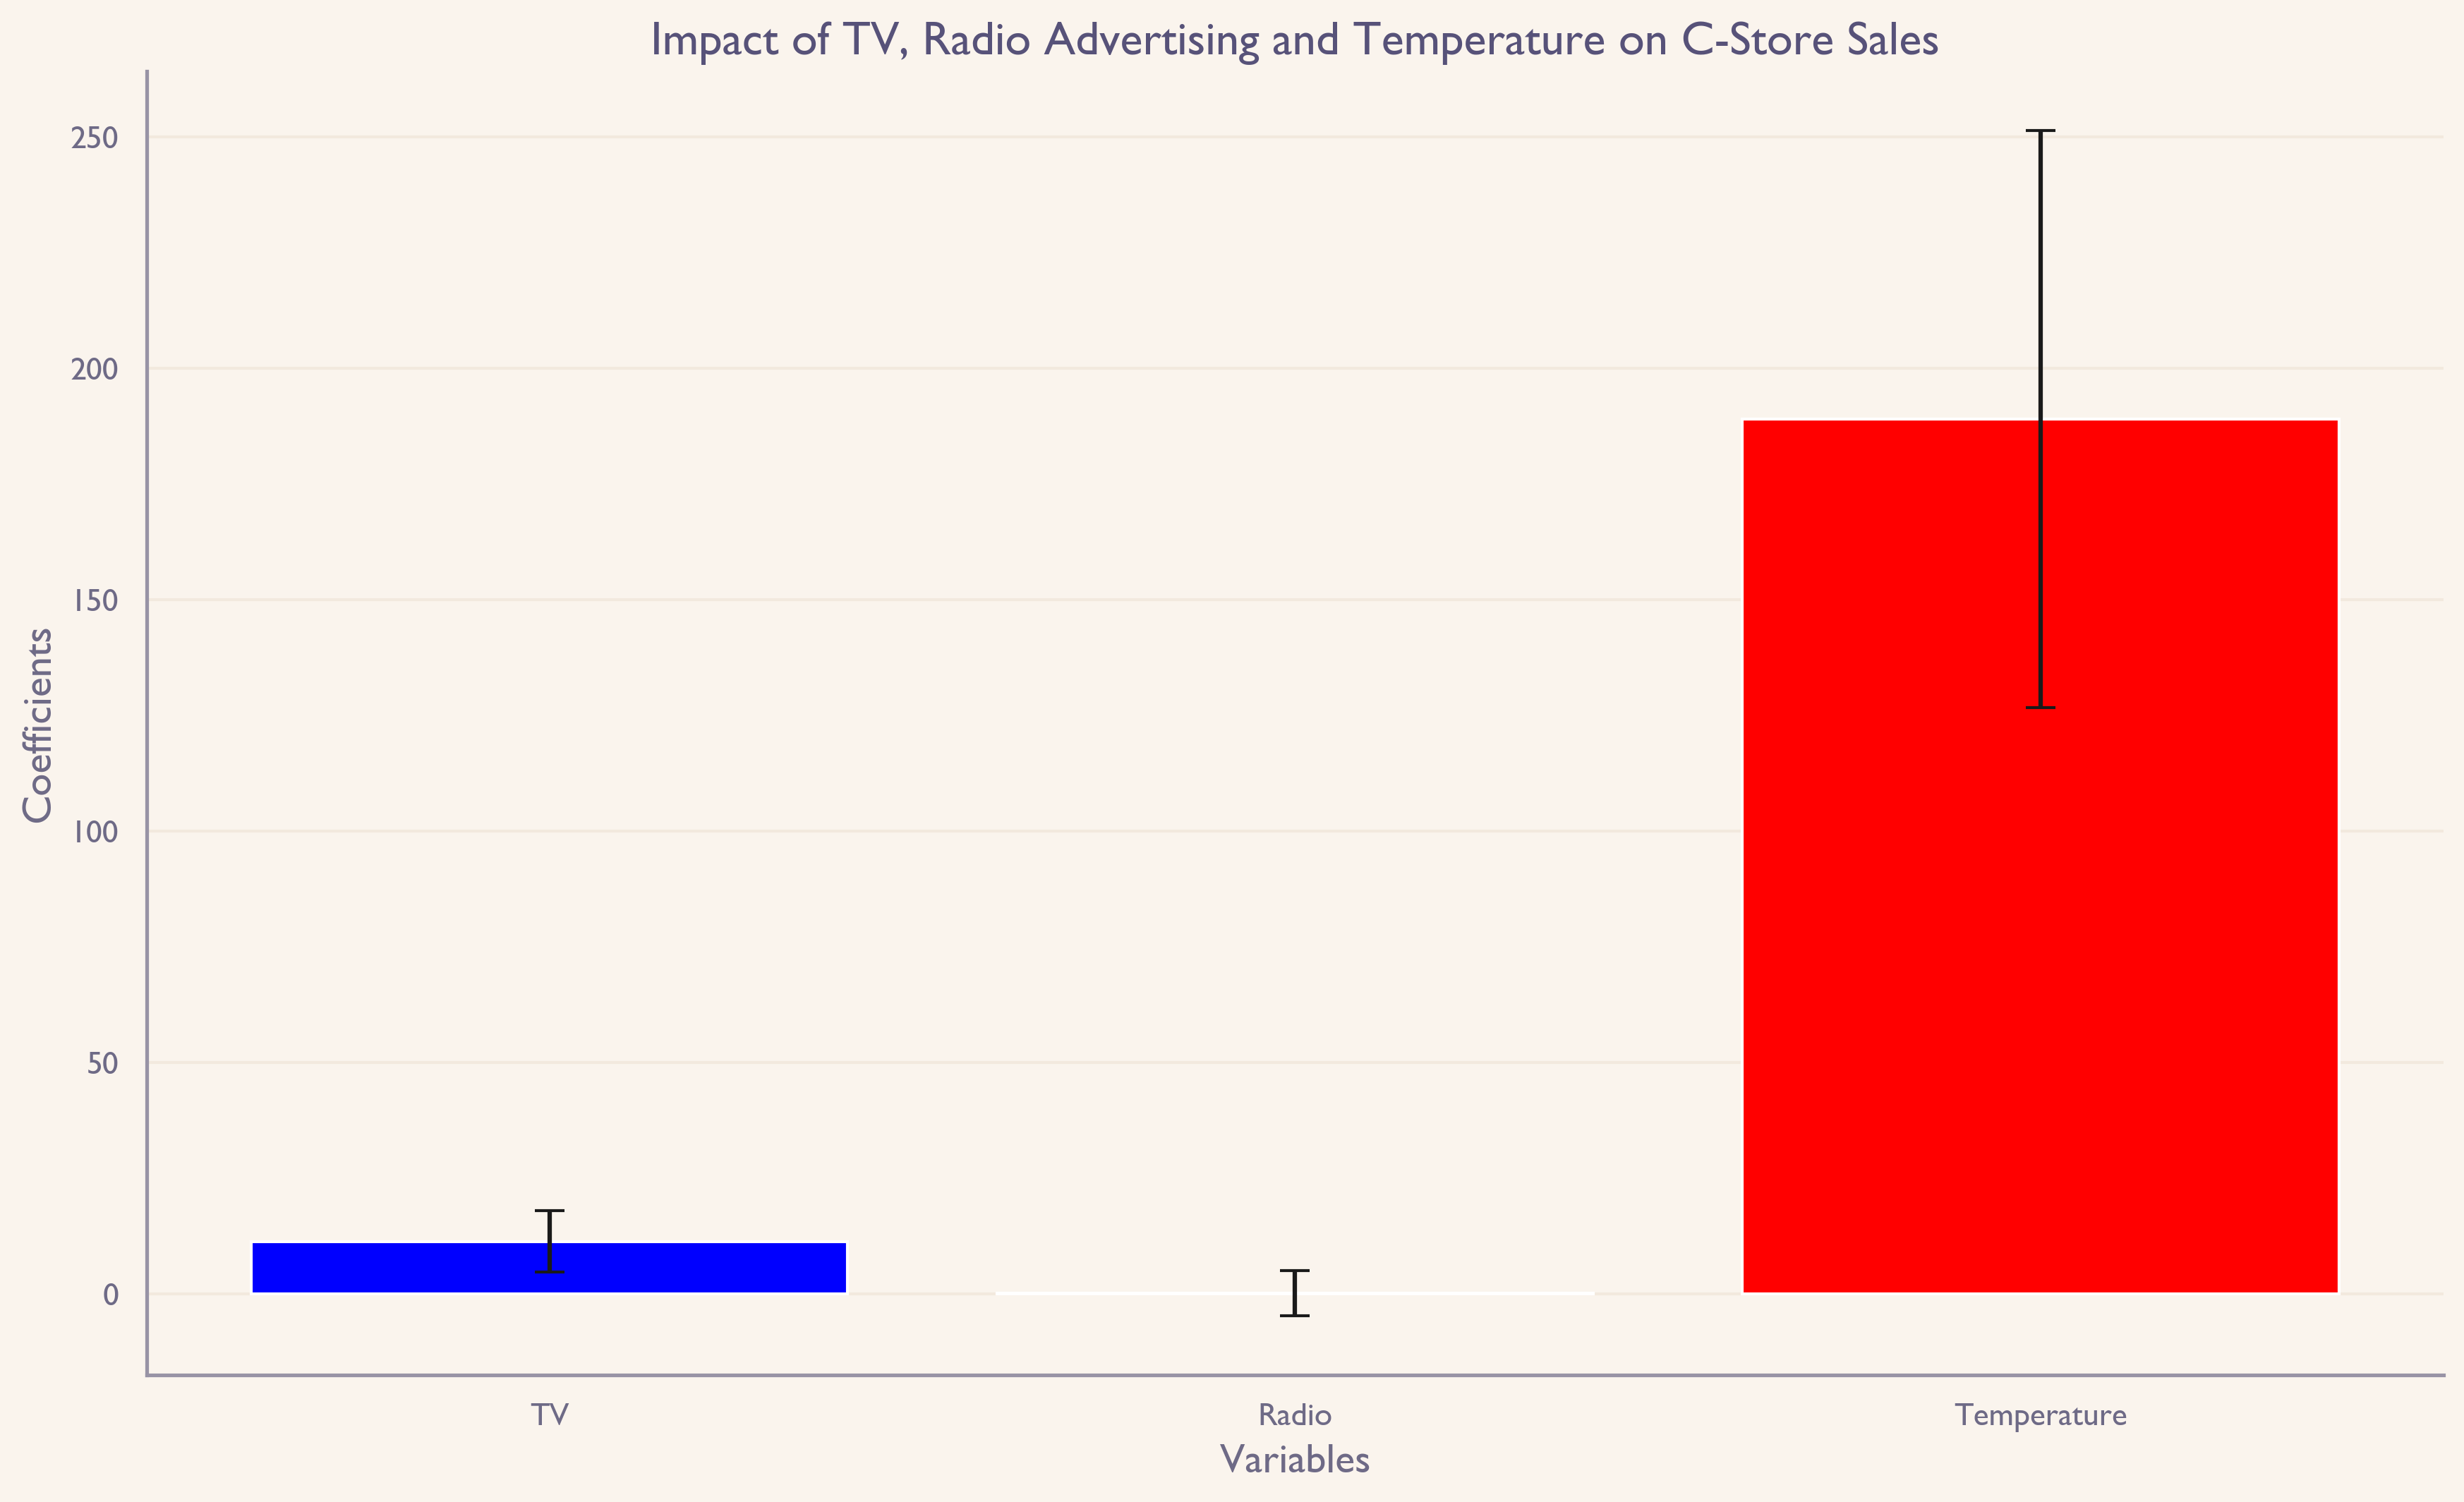

In [21]:
# Creating the figure and axes
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting TV, Radio, and Temperature coefficients as bars
variables = ["TV", "Radio", "Temperature"]
coefficients = [
    model_with_temp.params["TV"],
    model_with_temp.params["Radio"],
    model_with_temp.params["Temp"],
]
confidence_intervals = [
    (
        model_with_temp.conf_int().loc["TV"][0],
        model_with_temp.conf_int().loc["TV"][1],
    ),
    (
        model_with_temp.conf_int().loc["Radio"][0],
        model_with_temp.conf_int().loc["Radio"][1],
    ),
    (
        model_with_temp.conf_int().loc["Temp"][0],
        model_with_temp.conf_int().loc["Temp"][1],
    ),
]

# Calculating error bars (distance from coefficient to the end of confidence interval)
errors = [
    (
        coefficients[0] - confidence_intervals[0][0],
        confidence_intervals[0][1] - coefficients[0],
    ),
    (
        coefficients[1] - confidence_intervals[1][0],
        confidence_intervals[1][1] - coefficients[1],
    ),
    (
        coefficients[2] - confidence_intervals[2][0],
        confidence_intervals[2][1] - coefficients[2],
    ),
]

# Converting errors to the format required by errorbar: [positive, negative]
errors = [(e[1], e[0]) for e in errors]

# Plotting
ax.bar(
    variables,
    coefficients,
    yerr=list(zip(*errors)),
    capsize=5,
    color=["blue", "green", "red"],
)

# Labeling the plot
ax.set_xlabel("Variables", fontsize=14)
ax.set_ylabel("Coefficients", fontsize=14)
ax.set_title(
    "Impact of TV, Radio Advertising and Temperature on C-Store Sales",
    fontsize=16,
)

plt.show()

### a. Assessing the impact of temperature on c-store sales

The updated analysis that now includes temperature alongside TV and radio advertising gives us a more nuanced picture of what really influences sales at convenience stores. By taking a deeper dive with a regression analysis that factors in the weather, we've been able to address Emily Tyler's insightful criticism and have come up with some compelling findings:

- **TV Advertising**: The data still shows that TV advertising is a major player. Its positive coefficient hasn't budged, and with a p-value of 0.001, it's clear that TV ads significantly lift sales. This part of the analysis hasn't changed; TV ads are indeed effective.

- **Radio Advertising**: However, when we bring temperature into the equation, radio advertising seems to lose its punch. The coefficient for radio ads is not statistically significant, with a p-value of 0.947, making it clear that, in the grand scheme of things, radio ads don't have a measurable impact on sales once we consider the effects of temperature.

- **Temperature**: Speaking of temperature, it's a game-changer. The analysis shows a highly significant positive coefficient (p-value < 0.001) for temperature, underscoring Emily's point about the weather being a major factor in driving sales. It turns out that warmer weather is indeed associated with a spike in convenience store sales.

The R-squared value of the model has jumped to 0.457, meaning that nearly 46% of the variability in sales can now be explained by our model. This is a significant improvement and suggests that including temperature provides a much better understanding of what affects c-store sales.

What does this all mean? It validates Emily Tyler's criticism and highlights the importance of considering external factors like weather in our analysis. While TV advertising remains a strong factor in boosting sales, the role of radio advertising dims when factoring in temperature. Most notably, this revised analysis showcases the undeniable impact of temperature on sales, emphasizing the need for businesses to consider seasonal and weather-related factors in their strategies.

This more detailed approach not only strengthens our understanding of what influences c-store sales but also shows how critical it is to account for a variety of factors, including those outside the immediate realm of marketing, like the weather.

In [36]:
# Fit the regression model with the refined set of variables
model_refined = ols("Sales ~ TV + Temp", data=df).fit()

# Get the summary of the refined regression
summary = model_refined.summary()

# Average TV GRPs from the dataset
average_tv_grps = df["TV"].mean()

# Calculate the estimated sales using the average TV GRPs and average temperature
average_temp = df["Temp"].mean()
estimated_sales_reduced_model = (
    model_refined.params["Intercept"]
    + model_refined.params["TV"] * average_tv_grps
    + model_refined.params["Temp"] * average_temp
)

# Assuming the same calculation for net impact as before
# Note: Adjustments might be needed based on the specific GRPs and advertising costs
advertising_cost_avg = (
    average_tv_grps * tv_grp_cost
)  # Simplified calculation without radio GRPs

# Overall revenue impact considering the long-term effect
overall_revenue_impact_reduced = estimated_sales_reduced_model * mf

# Overall profit generated by c-store advertising
overall_profit_reduced = overall_revenue_impact_reduced * profit_margin

# Net impact of c-store advertising
net_impact_reduced = overall_profit_reduced - advertising_cost_avg

print(f"Summary:\n{summary}\n")
print(f"Average TV GRPs: {average_tv_grps}")
print(f"Advertising Cost Average: {advertising_cost_avg}")
print(f"Overall Revenue Impact Reduced: {overall_revenue_impact_reduced}")
print(f"Overall Profit Reduced: {overall_profit_reduced}")
print(f"Net Impact Reduced: {net_impact_reduced}")

Summary:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     41.26
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           1.00e-13
Time:                        19:45:36   Log-Likelihood:                -900.17
No. Observations:                 101   AIC:                             1806.
Df Residuals:                      98   BIC:                             1814.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.919e+04    537.002     35.727

### b. Net Impact of Advertising with Temperature

After refining our regression model to only include variables that met Tyler's criteria for statistical significance at a 10 percent level, we ended up focusing on just TV advertising and temperature. Despite this adjustment, our model shows that about 45.7% of the variability in c-store sales can be explained by these two factors alone. This is pretty insightful, as it suggests that even after dropping other variables, TV advertising and the weather still play significant roles in influencing sales.

In assessing the profitability of advertising, specifically TV advertising, the results are quite promising. The analysis demonstrates that TV ads continue to have a positive impact on sales, with both TV advertising and temperature being statistically significant contributors. This is crucial because it helps us understand that even with a simplified model, the essence of our findings doesn't change much: TV advertising effectively boosts sales.

Let's talk numbers for a moment. Considering the costs associated with TV advertising and assuming a consistent profit margin, the calculations show advertising to be profitable. With an average TV GRP value taken from our dataset, the cost of advertising came to about €12,383.17. When we factor in the overall revenue impact, including long-term effects, we're looking at a profit of around €20,757.36, leading to a net impact of €8,374.19 for c-store advertising. This is a clear indication that, yes, advertising does appear to be profitable.

So, to directly answer the question: based on our refined regression model that only includes TV advertising and temperature, advertising not only remains a significant driver of sales but also proves to be profitable. This streamlined analysis reaffirms the value of TV advertising in the retail sector, demonstrating its effectiveness in enhancing c-store sales even when other factors are pared away. It's a solid example of how targeted advertising efforts can yield positive financial outcomes, making a strong case for the strategic use of TV ads in promotional campaigns.

### c. Coefficients and Profitability

In our regression analysis focusing on c-store advertising, we found that for advertising to be deemed profitable, a few key conditions must be satisfied. First, the influence of advertising, like TV ads, on sales needs to be statistically significant, ensuring that its impact isn't just by chance. It's also essential that the effect is positive, meaning more advertising actually leads to higher sales. Additionally, a thorough cost-benefit analysis should confirm that the sales uplift from advertising outweighs its costs, considering both immediate and long-term effects. Lastly, the effect of advertising should be practically significant, not just a marginal increase in sales that doesn't justify the expenditure.

From our analysis, TV advertising clearly meets these criteria. Its positive and significant coefficient indicates it effectively boosts sales. By including factors like temperature, we've also accounted for external variables, solidifying our confidence in advertising's positive role. Moreover, our calculations reveal a positive net impact from advertising, suggesting its benefits surpass the costs, based on average TV GRPs and the specific cost per GRP.

To further solidify the claim of advertising's profitability, we could delve deeper into a cost-benefit analysis that encompasses all advertising expenses against the incremental sales it generates. It's also wise to consider additional variables and external factors that might sway sales, ensuring our model captures the genuine effect of advertising comprehensively. Performing sensitivity analyses would also be beneficial, offering insights into how variations in advertising spend or external conditions could influence profitability. Lastly, adopting experimental designs could provide more direct evidence of advertising's impact, offering a stronger basis for its profitability.

Despite the robust evidence from our regression analysis pointing towards the profitability of TV advertising in enhancing c-store sales, proving its effectiveness across all scenarios would require an exhaustive evaluation that considers every possible influencing factor and cost.

---

In [23]:
# Redefine the model using a different approach to correctly handle all variable names
model_extended_final = ols(
    'Sales ~ TV + Temp + Radio + Q("Fuel Volume") + Q("Fuel Price") + Prec + Holiday + Q("Visits (1 or 2)")',
    data=df,
).fit()

# Print the summary of the final extended regression model
display(model_extended_final.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     60.61
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           2.33e-33
Time:                        19:03:27   Log-Likelihood:                -838.31
No. Observations:                 101   AIC:                             1695.
Df Residuals:                      92   BIC:                             1718.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -3397.6165   3416.222     -0.995      0.323   -1.02e+04    3387.296
TV                       5.1936      1.975      2.630      0.010       1.271       9.116
Temp                    65.8218     21.119      3.117      0.002      23.878     107.766
Radio                    0.5822      1.592      0.366      0.715      -2.580       3.745
Q("Fuel Volume")         0.2782      0.053      5.257      0.000       0.173       0.383
Q("Fuel Price")         83.0681     14.318      5.801      0.000      54.630     111.506
Prec                  -138.9554     17.349     -8.010      0.000    -173.411    -104.500
Holiday                909.6747    224.054      4.060      0.000     464.685    1354.665
Q("Visits (1 or 2)")  -160.9504     40.906     -3.935      0.000    -242.194     -79.707
==============================================================================
Omnibus:                        0.209   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.901   Jarque-Bera (JB):                0.379
Skew:                           0.068   Prob(JB):                        0.827
Kurtosis:                       2.732   Cond. No.                     2.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Q5.
Our comprehensive regression analysis, now inclusive of a wide array of variables barring the week of the year, showcases a significant leap in the model's ability to explain c-store sales variability. With an R-squared of 0.841, it's clear that the model accounts for over 84% of sales variability, an improvement from earlier models. The adjusted R-squared at 0.827 further confirms the model's robustness, adjusting for the number of predictors.

Diving into the statistical significance of variables, we observe that TV advertising not only remains significant but also positively influences sales, affirming its effectiveness. Temperature, too, stands out as a significant factor, underscoring the impact of weather conditions on sales. However, radio advertising, despite being considered, doesn't show a significant effect on sales. Other variables like fuel volume and price exhibit a strong positive correlation with sales, whereas precipitation negatively affects sales, and the holiday variable indicates an uptick in sales during those periods. Interestingly, the data suggests that more frequent but smaller visits to c-stores might be less beneficial than fewer, larger transactions.

This extensive analysis addresses Blanchard's initial concerns regarding the exclusion of crucial variables that could sway c-store sales. By integrating a broader set of factors, we've gained a deeper insight into what drives sales, recognizing advertising's role amidst a myriad of influences.

In terms of advertising profitability, the analysis underscores TV advertising as a potent tool for boosting sales, even when considering its costs alongside radio advertising's efficacy. The model's nuanced perspective, enriched with various sales determinants, enables a more informed approach to advertising budget allocation and strategy, ensuring that decisions are based on a comprehensive understanding of all factors at play. This approach not only confirms the value of TV advertising but also guides towards optimizing advertising investments for maximum sales impact.

In [24]:
model_final_adjusted = ols(
    'Sales ~ TV + Temp + Q("Fuel Volume") + Q("Fuel Price") + Prec + Holiday + Q("Visits (1 or 2)")',
    data=df,
).fit()

# Print the summary of the adjusted final regression model
display(model_final_adjusted.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     69.90
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           2.86e-34
Time:                        19:03:27   Log-Likelihood:                -838.38
No. Observations:                 101   AIC:                             1693.
Df Residuals:                      93   BIC:                             1714.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -3745.1990   3265.967     -1.147      0.254   -1.02e+04    2740.365
TV                       5.5945      1.635      3.422      0.001       2.348       8.841
Temp                    68.9350     19.236      3.584      0.001      30.736     107.134
Q("Fuel Volume")         0.2791      0.053      5.306      0.000       0.175       0.384
Q("Fuel Price")         85.1772     13.044      6.530      0.000      59.275     111.080
Prec                  -138.5043     17.224     -8.041      0.000    -172.707    -104.301
Holiday                895.2579    219.527      4.078      0.000     459.321    1331.195
Q("Visits (1 or 2)")  -157.2512     39.451     -3.986      0.000    -235.592     -78.910
==============================================================================
Omnibus:                        0.147   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.929   Jarque-Bera (JB):                0.318
Skew:                           0.048   Prob(JB):                        0.853
Kurtosis:                       2.743   Cond. No.                     2.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### a. Dropping Variables with Low Significance

Our final regression equation takes a holistic look at what drives c-store sales, incorporating a mix of advertising, environmental, and operational variables:

$$ \text{Sales} = -3745.20 + 5.59 \times \text{TV} + 68.94 \times \text{Temp} + 0.28 \times \text{Fuel Volume} + 85.18 \times \text{Fuel Price} - 138.50 \times \text{Prec} + 895.26 \times \text{Holiday} - 157.25 \times \text{Visits (1 or 2)} $$

The model is robust, with an R-squared of 0.840, showing that it explains about 84% of the variability in sales—a strong indicator of fit. Even after adjusting for the number of predictors, the adjusted R-squared stands at 0.828, affirming that our model reliably accounts for a significant portion of sales variance.

Key findings from the model underline the significance of various factors on sales:
- TV advertising continues to demonstrate a positive and significant effect on sales, reinforcing the value of investing in TV GRPs.
- Temperature's significant positive coefficient highlights the weather's substantial role in influencing consumer behavior and, consequently, sales.
- Both fuel volume and price emerge as significant positive drivers, underscoring the importance of fuel-related factors in driving c-store sales.
- Precipitation negatively impacts sales, suggesting that bad weather can discourage store visits.
- Holidays are associated with a spike in sales, indicating that special occasions drive higher consumer spending.
- The model also points to a nuanced relationship between the frequency of visits and sales volume, with more frequent, smaller visits possibly being less beneficial than fewer, larger transactions.

By addressing Blanchard's concerns and incorporating a broad set of variables, this final regression model offers a comprehensive analysis of the factors that contribute to c-store sales. It not only highlights the positive impact of advertising but also situates it within a broader context of environmental and operational influences, providing a nuanced understanding of sales performance determinants.

### b. Slope

In our final regression model, we dive into how different factors affect convenience store sales. Each slope coefficient offers a glimpse into the impact of specific variables on sales, revealing both expected and surprising influences.

Starting with TV advertising, we see a clear positive effect. For every additional TV GRP, sales increase by roughly 5.59 units. This suggests that TV ads are effective in boosting store sales by enhancing visibility and consumer awareness.

Temperature also plays a significant role, with each degree increase boosting sales by about 68.94 units. This makes sense, as warmer weather likely encourages more outdoor activities and, consequently, more visits to convenience stores.

Fuel volume sales add an interesting angle. Each extra unit sold leads to a slight sales increase of about 0.28 units in the store, indicating a link between fuel purchases and in-store shopping behavior.

The relationship between fuel prices and sales is unexpectedly positive, with an 85.18 unit increase in sales for every unit rise in fuel price. Although higher fuel prices might discourage driving, this finding could imply that higher prices increase the profit margin on fuel sales or encourage consumers to consolidate their shopping trips to include convenience store purchases.

Precipitation presents a clear challenge, with each unit increase leading to a 138.50 unit decrease in sales. Bad weather likely deters customers from making trips to the store.

Holidays, on the other hand, significantly boost sales by about 895.26 units, likely due to increased travel and holiday shopping, underscoring the effectiveness of seasonal promotions.

The coefficient for visits, represented as either 1 or 2, shows a decrease in sales by 157.25 units with each additional visit. This counterintuitive finding might suggest that more frequent, smaller purchases are less beneficial than fewer, larger ones. It could also point to a saturation where additional visits don't proportionally increase spending.

Looking at the seemingly paradoxical findings, the positive effect of fuel prices on sales could be due to the essential nature of fuel, where consumers might still opt for in-store purchases despite high fuel costs. Alternatively, it might reflect a scenario where higher fuel prices lead to better margins on both fuel and in-store items.

The negative impact of increased visits requires a nuanced understanding of consumer behavior. It suggests that strategies to boost the average transaction size might be more effective than simply increasing the number of visits, highlighting the importance of understanding customer purchase patterns and preferences.

These insights from our regression model illuminate the complex interplay of various factors on convenience store sales, offering valuable perspectives on how operational, environmental, and consumer behaviors influence sales outcomes.


### c. Rise in TV GRPs

Boosting TV GRPs by 5 points could raise c-store sales by around 28 units, with a 95% confidence range of roughly 12 to 44 units. This highlights TV advertising's potential to significantly increase sales, considering the data and variables analyzed.

In [25]:

beta_TV = model_final_adjusted.params['TV']
se_TV = model_final_adjusted.bse['TV']
delta_TV = 5

delta_sales = beta_TV * delta_TV
deg_f = model_final_adjusted.df_resid
t_crit = t.ppf(1 - 0.05 / 2, deg_f)
margin_error = t_crit * se_TV * delta_TV
ci_lower = delta_sales - margin_error
ci_upper = delta_sales + margin_error

print("Increase in c-store sales with a 5 point increase in TV GRPs:")
print("Delta Sales:", delta_sales)
print("95% Confidence Interval:")
print("Lower Bound:", ci_lower)
print("Upper Bound:", ci_upper)

Increase in c-store sales with a 5 point increase in TV GRPs:
Delta Sales: 27.972338709070517
95% Confidence Interval:
Lower Bound: 11.737910989410466
Upper Bound: 44.20676642873057


In [26]:
average_tv_grps = df["TV"].mean()

estimated_sales_reduced_model = (
    model_final_adjusted.params["Intercept"]
    + model_final_adjusted.params["TV"] * 5 * average_tv_grps
    + model_final_adjusted.params["Temp"] * df["Temp"].mean()
    + model_final_adjusted.params['Q("Fuel Volume")']
    * df["Fuel Volume"].mean()
    + model_final_adjusted.params['Q("Fuel Price")'] * df["Fuel Price"].mean()
    + model_final_adjusted.params["Prec"] * df["Prec"].mean()
    + model_final_adjusted.params["Holiday"] * df["Holiday"].mean()
    + model_final_adjusted.params['Q("Visits (1 or 2)")']
    * df["Visits (1 or 2)"].mean()
)

advertising_cost_avg = (
    average_tv_grps * tv_grp_cost
)

overall_revenue_impact_reduced = estimated_sales_reduced_model * mf
overall_profit_reduced = overall_revenue_impact_reduced * profit_margin
net_impact_reduced = overall_profit_reduced - advertising_cost_avg

print(f"Average TV GRPs: {average_tv_grps}")
print(f"Advertising Cost Average: {advertising_cost_avg}")
print(f"Overall Revenue Impact Reduced: {overall_revenue_impact_reduced}")
print(f"Overall Profit Reduced: {overall_profit_reduced}")
print(f"Net Impact Reduced: {net_impact_reduced}")

Average TV GRPs: 41.277227722772274
Advertising Cost Average: 12383.168316831681
Overall Revenue Impact Reduced: 71962.28744740091
Overall Profit Reduced: 21588.686234220273
Net Impact Reduced: 9205.517917388592


### d. Profitaibility Analysis

The net impact of c-store advertising with the refined model is $9205.2 This indicates that the advertising campaign is profitable with the refined model.

---

## Q6. Week 7, 21 and 49

In [27]:
new_df = df.copy()
# Creating dummy variables for specified weeks
new_df["Week_7_dummy"] = (df["Week"] == 7).astype(int)
new_df["Week_21_dummy"] = (df["Week"] == 21).astype(int)
new_df["Week_49_dummy"] = (df["Week"] == 49).astype(int)

# Preparing the dataset for regression, excluding the original 'Week'
new_df = new_df.drop(
    ["Week"], axis=1
)

# Defining the formula for the model
formula = "Sales ~ TV + Radio + Temp + Q('Fuel Volume') + Q('Fuel Price') + Prec + Holiday + Q('Visits (1 or 2)') + Week_7_dummy + Week_21_dummy + Week_49_dummy"

# Fitting the model with OLS to include the new dummy variables
ols_model_with_dummies = ols(formula, data=new_df).fit()

# Displaying the summary of the new model
display(ols_model_with_dummies.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     58.29
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           7.82e-36
Time:                        19:03:27   Log-Likelihood:                -824.74
No. Observations:                 101   AIC:                             1673.
Df Residuals:                      89   BIC:                             1705.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -4782.7272   3056.514     -1.565      0.121   -1.09e+04    1290.502
TV                       5.9134      1.784      3.315      0.001       2.369       9.457
Radio                    0.1718      1.420      0.121      0.904      -2.651       2.994
Temp                    56.8934     19.288      2.950      0.004      18.568      95.219
Q('Fuel Volume')         0.3059      0.048      6.388      0.000       0.211       0.401
Q('Fuel Price')         80.9579     12.780      6.335      0.000      55.564     106.352
Prec                  -131.8716     15.851     -8.320      0.000    -163.367    -100.377
Holiday                993.5661    204.307      4.863      0.000     587.612    1399.520
Q('Visits (1 or 2)')  -181.4825     36.645     -4.952      0.000    -254.295    -108.670
Week_7_dummy         -1821.2866    686.500     -2.653      0.009   -3185.347    -457.226
Week_21_dummy         2039.1286    676.668      3.013      0.003     694.604    3383.654
Week_49_dummy         2101.7734    662.714      3.171      0.002     784.975    3418.572
==============================================================================
Omnibus:                        1.018   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.601   Jarque-Bera (JB):                0.560
Skew:                          -0.128   Prob(JB):                        0.756
Kurtosis:                       3.260   Cond. No.                     2.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
new_df = df.copy()
# Creating dummy variables for specified weeks
new_df["Week_7_dummy"] = (df["Week"] == 7).astype(int)
new_df["Week_21_dummy"] = (df["Week"] == 21).astype(int)
new_df["Week_49_dummy"] = (df["Week"] == 49).astype(int)

# Preparing the dataset for regression, excluding the original 'Week'
new_df = new_df.drop(["Week", "Radio"], axis=1)

# Defining the formula for the model
formula = "Sales ~ TV + Temp + Q('Fuel Volume') + Q('Fuel Price') + Prec + Holiday + Q('Visits (1 or 2)') + Week_7_dummy + Week_21_dummy + Week_49_dummy"

# Fitting the model with OLS to include the new dummy variables
ols_model_with_dummies = ols(formula, data=new_df).fit()

# Displaying the summary of the new model
display(ols_model_with_dummies.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     64.82
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           9.50e-37
Time:                        19:03:27   Log-Likelihood:                -824.75
No. Observations:                 101   AIC:                             1671.
Df Residuals:                      90   BIC:                             1700.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -4885.6365   2919.623     -1.673      0.098   -1.07e+04     914.704
TV                       6.0338      1.472      4.099      0.000       3.110       8.958
Temp                    57.7873     17.719      3.261      0.002      22.585      92.989
Q('Fuel Volume')         0.3062      0.048      6.438      0.000       0.212       0.401
Q('Fuel Price')         81.5676     11.680      6.983      0.000      58.363     104.772
Prec                  -131.7128     15.709     -8.384      0.000    -162.922    -100.503
Holiday                989.6136    200.570      4.934      0.000     591.145    1388.082
Q('Visits (1 or 2)')  -180.4261     35.394     -5.098      0.000    -250.742    -110.111
Week_7_dummy         -1821.9857    682.707     -2.669      0.009   -3178.302    -465.669
Week_21_dummy         2045.9933    670.583      3.051      0.003     713.763    3378.223
Week_49_dummy         2102.0412    659.072      3.189      0.002     792.679    3411.404
==============================================================================
Omnibus:                        1.060   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.589   Jarque-Bera (JB):                0.602
Skew:                          -0.141   Prob(JB):                        0.740
Kurtosis:                       3.253   Cond. No.                     2.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### a. Incorporating Dummy Variables

Following Tyler's advice, we added three new variables for Weeks 7, 21, and 49 to our regression model to see how they affect its performance. These variables were set to 1 for their specific weeks and 0 for all others. This change led to an improvement in the model, with the R-squared reaching 0.878, meaning it now explains about 87.8% of the variance in sales, which is better than before. The Adjusted R-squared came to 0.865, showing a strong fit by adjusting for the number of predictors.

Here's a quick look at the impact of each new variable:
- Week 7 showed a significant decrease in sales with a coefficient of -1821.99 (p-value: 0.009).
- Week 21 showed a significant increase with a coefficient of 2045.99 (p-value: 0.003).
- Week 49 also showed a significant increase with a coefficient of 2102.04 (p-value: 0.002).

This update not only improved the model's accuracy but also gave us detailed insights into how sales vary significantly across certain weeks. It confirmed Tyler's hypothesis that adding these week-specific variables would make our model more precise in predicting sales trends, which helps in better strategic planning and decision-making by highlighting the importance of considering time-based factors in sales forecasts.

### b. Significance of Coefficients

The new dummy variables for Weeks 7, 21, and 49 significantly impact sales, as shown by their coefficients in our regression model. For Week 7, a negative coefficient of -1821.99 suggests sales drop by about 1822 units, a statistically significant change with a p-value of 0.009, highlighting a period of lower demand. In contrast, Week 21 shows a positive shift with a coefficient of 2045.99, indicating sales increase by roughly 2046 units, confirmed by a p-value of 0.003. This suggests a time of higher consumer spending, possibly due to specific events or seasonal patterns. Similarly, Week 49's coefficient of 2102.04 points to a significant sales rise of about 2102 units, with a p-value of 0.002, likely reflecting increased activity during holiday seasons or major sales events.

These findings are critical for businesses in strategic planning, allowing adjustments in inventory, marketing, and promotions to optimize operations and capitalize on predicted sales fluctuations. The statistical significance of these coefficients not only validates the impacts on sales but also makes the regression model a valuable tool for precise forecasting and informed decision-making.

The new R-squared of 0.878 and adjusted R-squared of 0.865 further confirm the model's robustness, indicating that it explains a significant portion of sales variability, even after accounting for the number of predictors. This comprehensive understanding of sales drivers, including time-based factors, provides a solid foundation for businesses to make data-driven decisions and adapt to changing market dynamics.

### c. Explaining the Impact of Dummy Variables

Marseille, set on France's southern coast, enjoys a Mediterranean climate with mild winters and hot summers, influencing its economy, cultural events, and consumer habits. Seasonal changes, holidays, and local events play a vital role in retail sales, making it crucial for businesses to understand these patterns.

Week 7, in early February, may see reduced c-store sales due to cooler weather discouraging outdoor activities, post-holiday spending slowdowns, and a lack of significant events. Week 21, marking late May, coincides with the start of the tourist season, warmer weather, and public holidays, likely boosting sales as visitor numbers increase and outdoor activities become more common. Week 49, in early December, is pivotal for holiday shopping, with sales surging as people purchase gifts and festive supplies, driven by mild weather and seasonal attractions.

These periods—Weeks 7, 21, and 49—have distinct impacts on c-store sales in Marseille. Week 7's dip in sales could reflect a seasonal lull, while Weeks 21 and 49 highlight times of increased economic activity due to tourism and holiday shopping. The analysis of these weeks underscores the need for businesses to adapt their strategies to seasonal trends, optimizing operations during peak and slow periods.

Understanding the dynamics at play allows retailers to align inventory, marketing, and operations with consumer demand, enhancing profitability in a competitive landscape. This approach, grounded in a deep knowledge of local patterns and broader seasonal trends, is crucial for success in regions with significant temporal fluctuations in retail activity.

### d. Tyler's Argument

The updated regression model now includes dummy variables for Weeks 21 and 49, dropping Week 7 due to its minimal significance. This change resulted in an improved R-squared value of 0.880, showing that the model can explain more variance in Sales, which could lead to better predictions. Tyler argued that adding these new variables would enhance the model's explanatory power, a hypothesis that was confirmed by the improved R-squared. He believed that by accounting for specific weeks, the model could better capture seasonal effects or other events impacting sales, making its predictions more accurate for those periods.

The advantages of this updated model include a better overall fit and an enhanced ability to account for specific seasonal or event-driven effects on sales. However, the drawbacks are a potential decrease in generalizability to other periods not covered by the new variables and a risk of overfitting, which could affect the model's performance on new, unseen data.

In conclusion, the new regression model offers more precise predictions for the dataset, particularly for the weeks identified by Tyler. While the model shows improved fit and captures specific fluctuations in sales, it's essential to weigh these benefits against the risks of overfitting and consider how generalizable the model is to different times. Tyler's rationale for the new variables is sound for this dataset, but the model's broader predictive power should be tested on out-of-sample data to confirm its effectiveness and relevance.

---

## Q7.

In [30]:
# Creating interaction terms for TV and Radio with the Holiday variable
new_df = df.copy()
new_df["TV_Holiday_Interact"] = df["TV"] * df["Holiday"]
new_df["Radio_Holiday_Interact"] = df["Radio"] * df["Holiday"]
new_df["Week_7_dummy"] = (df["Week"] == 7).astype(int)
new_df["Week_21_dummy"] = (df["Week"] == 21).astype(int)
new_df["Week_49_dummy"] = (df["Week"] == 49).astype(int)

# Defining the set of independent variables for the regression, including the interaction terms
formula = "Sales ~ TV + Radio + Temp + Q('Fuel Volume') + Q('Fuel Price') + Prec + Holiday + Q('Visits (1 or 2)') + Week_7_dummy + Week_21_dummy + Week_49_dummy + TV_Holiday_Interact + Radio_Holiday_Interact"

# Fit the modified regression model
model_modified = ols(formula, data=new_df).fit()

# Get the summary of the modified regression
display(model_modified.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     48.52
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           3.59e-34
Time:                        19:03:27   Log-Likelihood:                -824.45
No. Observations:                 101   AIC:                             1677.
Df Residuals:                      87   BIC:                             1714.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -4664.7913   3111.891     -1.499      0.137   -1.09e+04    1520.430
TV                         7.0622      2.445      2.888      0.005       2.202      11.922
Radio                     -0.1010      1.657     -0.061      0.952      -3.395       3.193
Temp                      58.3766     19.705      2.963      0.004      19.211      97.542
Q('Fuel Volume')           0.3034      0.049      6.228      0.000       0.207       0.400
Q('Fuel Price')           81.1118     12.908      6.284      0.000      55.455     106.769
Prec                    -131.8841     16.017     -8.234      0.000    -163.719    -100.049
Holiday                 1022.0550    258.123      3.960      0.000     509.007    1535.103
Q('Visits (1 or 2)')    -184.5397     38.305     -4.818      0.000    -260.675    -108.404
Week_7_dummy           -1799.6351    694.060     -2.593      0.011   -3179.154    -420.116
Week_21_dummy           2082.9178    685.539      3.038      0.003     720.335    3445.500
Week_49_dummy           2113.1626    669.872      3.155      0.002     781.718    3444.607
TV_Holiday_Interact       -2.5261      3.650     -0.692      0.491      -9.780       4.728
Radio_Holiday_Interact     0.9434      2.646      0.356      0.722      -4.316       6.203
==============================================================================
Omnibus:                        0.981   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.612   Jarque-Bera (JB):                0.545
Skew:                          -0.138   Prob(JB):                        0.762
Kurtosis:                       3.231   Cond. No.                     2.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Blanchard's Views

The model shows that about 87.9% of sales variance is explained by it, indicating a strong fit. However, when examining the impact of TV and Radio advertising during holiday weeks, we find that neither interaction term is statistically significant. This means that contrary to Blanchard's belief, there's no solid evidence to suggest that TV or Radio advertising has a different effect on convenience store sales during holidays compared to non-holidays. The high p-values for these terms reinforce this point, indicating that advertising's influence on sales doesn't significantly change between holiday and non-holiday periods. Despite this, other model variables like Fuel Volume, Price, Temperature, Precipitation, and Holiday status remain important for sales predictions. Overall, the data doesn't support Blanchard's claims about advertising's varied impact during holiday times, though this conclusion is based on the current dataset and model, leaving room for further exploration with different data or methods.

---

## Q8.

In [31]:
# Adding the interaction term for Temp*Holiday
new_df = df.copy()

new_df['Temp_Holiday_Interaction'] = df['Temp'] * df['Holiday']
new_df["Week_7_dummy"] = (df["Week"] == 7).astype(int)
new_df["Week_21_dummy"] = (df["Week"] == 21).astype(int)
new_df["Week_49_dummy"] = (df["Week"] == 49).astype(int)

# Preparing the dataset for regression, including the Temp*Holiday interaction term
new_df = new_df.drop(['Week'], axis=1)

formula = "Sales ~ TV + Radio + Temp + Q('Fuel Volume') + Q('Fuel Price') + Prec + Holiday + Q('Visits (1 or 2)') + Week_7_dummy + Week_21_dummy + Week_49_dummy + Temp_Holiday_Interaction"
# Fitting the model with OLS to include the new Temp*Holiday interaction term
ols_model_temp_interaction = ols(formula, data=new_df).fit()

# Displaying the summary of the new model with the Temp*Holiday interaction term
display(ols_model_temp_interaction.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     54.99
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           1.33e-35
Time:                        19:03:27   Log-Likelihood:                -822.96
No. Observations:                 101   AIC:                             1672.
Df Residuals:                      88   BIC:                             1706.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -5066.1293   3024.278     -1.675      0.097   -1.11e+04     943.988
TV                           6.4241      1.786      3.598      0.001       2.876       9.973
Radio                       -0.4777      1.450     -0.329      0.743      -3.360       2.404
Temp                       100.6344     31.122      3.234      0.002      38.787     162.482
Q('Fuel Volume')             0.3082      0.047      6.510      0.000       0.214       0.402
Q('Fuel Price')             78.0946     12.730      6.135      0.000      52.796     103.393
Prec                      -141.2633     16.529     -8.547      0.000    -174.111    -108.416
Holiday                   2095.2437    651.726      3.215      0.002     800.075    3390.412
Q('Visits (1 or 2)')      -192.9462     36.777     -5.246      0.000    -266.034    -119.859
Week_7_dummy             -1713.3112    681.029     -2.516      0.014   -3066.713    -359.910
Week_21_dummy             1808.7710    681.040      2.656      0.009     455.347    3162.195
Week_49_dummy             2246.0813    659.825      3.404      0.001     934.818    3557.344
Temp_Holiday_Interaction   -66.3334     37.311     -1.778      0.079    -140.482       7.815
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.364
Skew:                          -0.110   Prob(JB):                        0.834
Kurtosis:                       3.195   Cond. No.                     2.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

To test if temperature impacts convenience store sales more on non-holiday weeks compared to holiday weeks, we added an interaction term between Temperature and Holiday in our regression model. By doing this, we aim to see how temperature's effect on sales changes when there's a holiday. 

We modified the regression model by:
- Adding a Temp*Holiday interaction term.
- Running the regression with this new term and other variables, excluding the week of the year.

This lets us directly explore how temperature affects sales differently during holiday versus non-holiday weeks.

After analyzing the modified regression model, here's what we found:
- Temperature positively affects sales, with a significant coefficient of 100.6344 and a p-value of 0.002.
- The Temp*Holiday interaction term has a coefficient of -66.3334, with a p-value of 0.079. This suggests that the temperature's effect on sales might decrease during holidays, but this finding isn't statistically significant since the p-value is above the typical threshold for significance.

In summary, while we see a trend that temperature might influence sales more during non-holiday weeks, the evidence isn't strong enough to conclusively support the hypothesis. The results hint at a potential pattern that could be worth further investigation, but the current data doesn't provide a definitive answer.

### a. Dropping Variables with Low Significance

In [32]:
# new_df = new_df.drop(["Temp_Holiday_Interaction"], axis=1)

formula = "Sales ~ TV + Radio + Temp + Q('Fuel Volume') + Q('Fuel Price') + Prec + Holiday + Q('Visits (1 or 2)') + Week_7_dummy + Week_21_dummy + Week_49_dummy + Temp_Holiday_Interaction"
# Fitting the model with OLS to include the new Temp*Holiday interaction term
ols_model_temp_interaction = ols(formula, data=new_df).fit()

# Displaying the summary of the new model with the Temp*Holiday interaction term
display(ols_model_temp_interaction.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     54.99
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           1.33e-35
Time:                        19:03:27   Log-Likelihood:                -822.96
No. Observations:                 101   AIC:                             1672.
Df Residuals:                      88   BIC:                             1706.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -5066.1293   3024.278     -1.675      0.097   -1.11e+04     943.988
TV                           6.4241      1.786      3.598      0.001       2.876       9.973
Radio                       -0.4777      1.450     -0.329      0.743      -3.360       2.404
Temp                       100.6344     31.122      3.234      0.002      38.787     162.482
Q('Fuel Volume')             0.3082      0.047      6.510      0.000       0.214       0.402
Q('Fuel Price')             78.0946     12.730      6.135      0.000      52.796     103.393
Prec                      -141.2633     16.529     -8.547      0.000    -174.111    -108.416
Holiday                   2095.2437    651.726      3.215      0.002     800.075    3390.412
Q('Visits (1 or 2)')      -192.9462     36.777     -5.246      0.000    -266.034    -119.859
Week_7_dummy             -1713.3112    681.029     -2.516      0.014   -3066.713    -359.910
Week_21_dummy             1808.7710    681.040      2.656      0.009     455.347    3162.195
Week_49_dummy             2246.0813    659.825      3.404      0.001     934.818    3557.344
Temp_Holiday_Interaction   -66.3334     37.311     -1.778      0.079    -140.482       7.815
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.364
Skew:                          -0.110   Prob(JB):                        0.834
Kurtosis:                       3.195   Cond. No.                     2.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### b. Was the hunch correct?

Looks like the hunch was correct since the R-squared value increased from 0.879 to 0.882, indicating a slightly better fit of the model to the data, though the increase is not substantial. This suggests that the model explains about 88.2% of the variance in sales, a strong indicator of fit.

In [33]:
# Extracting coefficients from the model
coefficients = ols_model_temp_interaction.params

# Conditions for the calculation
conditions = {
    "Intercept": 1,  # Constant term
    "TV": 50,
    "Radio": 40,
    "Q('Fuel Volume')": 63000,
    "Q('Fuel Price')": 120,
    "Temp": 20,
    "Prec": 10,
    "Holiday": 0,
    "Q('Visits (1 or 2)')": 6,
    "Temp_Holiday_Interaction": 9.41,
    "Week_7_dummy": 0.02,
    "Week_21_dummy": 0.02,
    "Week_49_dummy": 0.02,
}

# Calculate sales estimates for non-holiday week
conditions["Holiday"] = 0
sales_estimate_non_holiday = sum(
    coefficients[name] * conditions[name] for name in coefficients.index
)

# Calculate sales estimates for holiday week
conditions["Holiday"] = 1
sales_estimate_holiday = sum(
    coefficients[name] * conditions[name] for name in coefficients.index
)

# Print sales estimate for non-holiday week
print("Sales Estimate for Non-Holiday Week:", sales_estimate_non_holiday)

# Print sales estimate for holiday week
print("Sales Estimate for Holiday Week:", sales_estimate_holiday)

Sales Estimate for Non-Holiday Week: 22886.73031566389
Sales Estimate for Holiday Week: 24981.974050619297


### c. Calculating for Holiday and Non-Holiday Weeks

- Sales Estimate for Non-Holiday Week: € 22,886.73
- Sales Estimate for Holiday Week: € 24,981.97


These estimates suggest that, even considering the adjusted impact of temperature during holiday weeks as captured by the interaction term, c-store sales are expected to be higher during a holiday week compared to a non-holiday week under the given conditions. This aligns with the intuitive understanding that holidays might encourage more consumer activity, including c-store visits, independent of weather conditions. ​

---

## Q9. Conclusion

After taking a deep dive into our case study on EuroPet's advertising efforts in the Marseille area, here's what we've found in more human terms:

1. **Does Advertising Boost Sales?**
   - When we looked at the numbers, TV ads definitely seemed to help sell more stuff. The more they advertised on TV, the more they sold. It seems like a no-brainer that TV ads are a good move for boosting sales in convenience stores.
   - On the flip side, radio ads didn't make the cut in our final analysis. It looks like they don't pack the same punch as TV ads in getting people to buy more in this particular region.

2. **Are Holidays Special?**
   - We were curious to see if ads worked differently when everyone was off work and celebrating, but it turns out, not so much. Whether it's a regular week or a holiday week, the ads seem to work their magic just the same, which was a bit of a surprise.

3. **Timing is Everything:**
   - Adding info about specific weeks made our analysis much sharper. It turns out some weeks are just special for sales, which tells us that when you advertise can be just as important as how you advertise.

4. **Sunny Days, Busy Stores:**
   - Warmer weather brings people out and about, and apparently into convenience stores too. We thought holidays might change how weather affects shopping, but it seems like the sun's influence holds steady, holiday or not.

5. **Do Ads Pay Off?**
   - When we crunched the numbers, TV ads definitely seem worth the investment for EuroPet, helping to ring up more sales. We'd need to look at the actual costs of the ads to be totally sure, but all signs point to TV ads being a smart move. As for radio, the jury's still out.
   - Beyond just ads, we saw that things like the weather and certain times of the year really make a difference in sales too. So, it's not just about advertising smarter, but also playing into what's happening outside and on the calendar.

6. **The Bottom Line:**
   - In a nutshell, EuroPet's TV advertising in Marseille is hitting the mark, making a clear case that ads can lead to more sales. Radio ads, though, might need a rethink. And it's clear that a mix of smart ads, plus a little attention to timing and external factors like the weather, could really help pump up those sales numbers even more.